<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Import-Feature-Data" data-toc-modified-id="Import-Feature-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Feature Data</a></span></li><li><span><a href="#Prepare-Data-For-Feature-Exploration" data-toc-modified-id="Prepare-Data-For-Feature-Exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare Data For Feature Exploration</a></span><ul class="toc-item"><li><span><a href="#how-many-zeros-in-our-target-data?" data-toc-modified-id="how-many-zeros-in-our-target-data?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>how many zeros in our target data?</a></span></li><li><span><a href="#choose-target-and-drop-zeroes" data-toc-modified-id="choose-target-and-drop-zeroes-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>choose target and drop zeroes</a></span></li></ul></li><li><span><a href="#split-data" data-toc-modified-id="split-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>split data</a></span><ul class="toc-item"><li><span><a href="#choose-feature-column" data-toc-modified-id="choose-feature-column-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>choose feature column</a></span></li></ul></li><li><span><a href="#Functions-to-Help-With-Modeling" data-toc-modified-id="Functions-to-Help-With-Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Functions to Help With Modeling</a></span></li><li><span><a href="#Create-first-training-data-set" data-toc-modified-id="Create-first-training-data-set-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Create first training data set</a></span><ul class="toc-item"><li><span><a href="#Run-RandomForest-Model" data-toc-modified-id="Run-RandomForest-Model-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Run RandomForest Model</a></span></li><li><span><a href="#compare-raw-model-with-shap-feature-selection-model" data-toc-modified-id="compare-raw-model-with-shap-feature-selection-model-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>compare raw model with shap feature selection model</a></span></li><li><span><a href="#feature-engineering-fracdiff" data-toc-modified-id="feature-engineering-fracdiff-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>feature engineering fracdiff</a></span></li><li><span><a href="#feature-engineering-fracdiff-only-nonranked-columns" data-toc-modified-id="feature-engineering-fracdiff-only-nonranked-columns-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>feature engineering fracdiff only nonranked columns</a></span></li><li><span><a href="#run-model-with-all-features-fracdiff-nonranked" data-toc-modified-id="run-model-with-all-features-fracdiff-nonranked-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>run model with all features fracdiff nonranked</a></span><ul class="toc-item"><li><span><a href="#get-shap-features" data-toc-modified-id="get-shap-features-6.5.1"><span class="toc-item-num">6.5.1&nbsp;&nbsp;</span>get shap features</a></span></li></ul></li><li><span><a href="#run-model-with-fracdiff-nonranked-features" data-toc-modified-id="run-model-with-fracdiff-nonranked-features-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>run model with fracdiff nonranked features</a></span></li><li><span><a href="#Scale-features-first" data-toc-modified-id="Scale-features-first-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>Scale features first</a></span></li><li><span><a href="#run-model-with-ensemble-classifier" data-toc-modified-id="run-model-with-ensemble-classifier-6.8"><span class="toc-item-num">6.8&nbsp;&nbsp;</span>run model with ensemble classifier</a></span></li><li><span><a href="#run-fracdiff-nonranked-data-with-stacked-classifier" data-toc-modified-id="run-fracdiff-nonranked-data-with-stacked-classifier-6.9"><span class="toc-item-num">6.9&nbsp;&nbsp;</span>run fracdiff nonranked data with stacked classifier</a></span></li></ul></li><li><span><a href="#TSFresh-Features" data-toc-modified-id="TSFresh-Features-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>TSFresh Features</a></span></li><li><span><a href="#Sktime-timeseries-models" data-toc-modified-id="Sktime-timeseries-models-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Sktime timeseries models</a></span><ul class="toc-item"><li><span><a href="#TimeSeriesForestClassifer" data-toc-modified-id="TimeSeriesForestClassifer-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>TimeSeriesForestClassifer</a></span></li><li><span><a href="#ElasticEnsemble" data-toc-modified-id="ElasticEnsemble-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>ElasticEnsemble</a></span></li><li><span><a href="#ProximityForest" data-toc-modified-id="ProximityForest-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>ProximityForest</a></span></li><li><span><a href="#HiveCotev2" data-toc-modified-id="HiveCotev2-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>HiveCotev2</a></span></li></ul></li><li><span><a href="#OOS" data-toc-modified-id="OOS-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>OOS</a></span></li></ul></div>

# Imports

In [2]:
%load_ext watermark
%watermark

%load_ext autoreload
%autoreload 2

# import standard libs
import warnings

warnings.filterwarnings("ignore")
from IPython.display import display
from IPython.core.debugger import set_trace as debug
from pathlib import Path
import itertools
from pprint import pprint
from decimal import Decimal


def get_relative_project_dir(project_repo_name=None, partial=True):
    """helper fn to get local project directory"""
    current_working_directory = Path.cwd()
    cwd_parts = current_working_directory.parts
    if partial:
        while project_repo_name not in cwd_parts[-1]:
            current_working_directory = current_working_directory.parent
            cwd_parts = current_working_directory.parts
            if len(cwd_parts) == 1:
                if project_repo_name not in cwd_parts[0]:
                    raise ValueError(
                        f"{project_repo_name} not found in directory tree!"
                    )
    else:
        while cwd_parts[-1] != project_repo_name:
            current_working_directory = current_working_directory.parent
            cwd_parts = current_working_directory.parts
            if len(cwd_parts) == 1:
                if project_repo_name not in cwd_parts[0]:
                    raise ValueError(
                        f"{project_repo_name} not found in directory tree!"
                    )
    return current_working_directory


# import python scientific stack
import pandas as pd

pd.set_option("display.max_rows", 100)
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import numba as nb
from fracdiff.sklearn import FracdiffStat, Fracdiff

# import ffn
import mlxtend as mlx
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import (
    roc_curve,
    precision_recall_curve,
    auc,
    make_scorer,
    recall_score,
    accuracy_score,
    precision_score,
    confusion_matrix,
    matthews_corrcoef,
    classification_report,
)

import numpy_ext as npx
import lightgbm as lgb

import shap

# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
import seaborn as sns

# import util libs
from tqdm import tqdm, tqdm_notebook


# ---------------------------------------------------
# THESE ARE VARIABLES FOR EASILY ACCESSING DIFFERENT
# DIRECTORIES FOR ACCESSING AND SAVING DATA AND IMAGES
# IF NECESSARY. CHANGE THEM TO MATCH YOUR DIRECTORY
# STRUCTURE.
# ---------------------------------------------------

REPO_NAME = "19b MLT 04 How to Develop Trading Strategies using Machine Learning"  # CHANGE TO MATCH YOUR REPO NAME
print("\n", REPO_NAME)
project_dir = get_relative_project_dir(REPO_NAME)
data_dir = project_dir / "data"
external = data_dir / "external"
processed = data_dir / "processed"
viz = project_dir / "viz"


def cprint(df: pd.DataFrame, nrows: int = None):
    """
    Custom dataframe print function
    """
    if not isinstance(df, (pd.DataFrame,)):
        try:
            df = df.to_frame()
        except:
            raise ValueError("object cannot be coerced to df")

    if not nrows:
        nrows = 5
    print("*" * 79)
    print("dataframe information")
    print("-" * 79)
    print(f"HEAD num rows: {nrows}")
    print(df.head(nrows))
    print("-" * 25)
    print(f"TAIL num rows: {nrows}")
    print(df.tail(nrows))
    print("-" * 50)
    print(df.info())
    print("*" * 79)
    print()
    return


def quantize(number, digits=-2):
    num_places = Decimal(10) ** digits
    q = Decimal(number).quantize(num_places)
    q = float(q)
    return q


print()
%watermark -v --iversions

Last updated: 2022-12-05T22:14:52.404916+05:30

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 8.4.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 12
Architecture: 64bit


 19b MLT 04 How to Develop Trading Strategies using Machine Learning

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 8.4.0

pandas     : 1.3.2
sklearn    : 1.1.3
lightgbm   : 3.3.3
scipy      : 1.9.3
numba      : 0.55.1
matplotlib : 3.5.2
numpy_ext  : 0.9.8
seaborn    : 0.11.1
statsmodels: 0.13.2
shap       : 0.41.0
mlxtend    : 0.21.0
numpy      : 1.21.5



In [3]:
sns_params = {
    "xtick.major.size": 2,
    "ytick.major.size": 2,
    "font.size": 12,
    "font.weight": "medium",
    "figure.figsize": (10, 7),
    # "font.family": "Ubuntu Mono",
}
sns.set_theme(
    context="talk",
    style="darkgrid",
    # palette=sns.color_palette("magma"),
    rc=sns_params,
)
savefig_kwds = dict(dpi=90, bbox_inches="tight", frameon=True, format="png")

# Import Feature Data

In [4]:
HDF_FILEPATH = processed / "spy_features.h5"

In [5]:
with pd.HDFStore(HDF_FILEPATH, "r") as store:
    store_keys = store.keys()
store_keys

['/spy/5m/10_day',
 '/spy/5m/1_day',
 '/spy/5m/21_day',
 '/spy/5m/2_day',
 '/spy/5m/3_day',
 '/spy/5m/5_day',
 '/spy/30m/10_day',
 '/spy/30m/1_day',
 '/spy/30m/21_day',
 '/spy/30m/2_day',
 '/spy/30m/3_day',
 '/spy/30m/5_day',
 '/spy/1W/12_month',
 '/spy/1W/1_month',
 '/spy/1W/2_week',
 '/spy/1W/3_month',
 '/spy/1W/3_week',
 '/spy/1W/6_month',
 '/spy/1H/10_day',
 '/spy/1H/1_day',
 '/spy/1H/21_day',
 '/spy/1H/2_day',
 '/spy/1H/3_day',
 '/spy/1H/5_day',
 '/spy/1H/63_day',
 '/spy/1D/10_day',
 '/spy/1D/126_day',
 '/spy/1D/21_day',
 '/spy/1D/252_day',
 '/spy/1D/2_day',
 '/spy/1D/3_day',
 '/spy/1D/5_day',
 '/spy/1D/63_day']

In [6]:
data = pd.read_hdf(HDF_FILEPATH, key="/spy/30m/10_day")
cprint(data)

*******************************************************************************
dataframe information
-------------------------------------------------------------------------------
HEAD num rows: 5
                       open    high     low   close       up     down  \
datetime                                                                
2004-08-23 10:00:00  110.36  110.46  110.24  110.34   654300   998500   
2004-08-23 10:30:00  110.34  110.61  110.30  110.59  1211300   505600   
2004-08-23 11:00:00  110.56  110.77  110.52  110.61   726500   758700   
2004-08-23 11:30:00  110.60  110.63  110.32  110.34   705300   984500   
2004-08-23 12:00:00  110.34  110.38  110.05  110.15  1445100  2048400   

                      volume  average_price   rvwap_480  upper_band_rvwap_480  \
datetime                                                                        
2004-08-23 10:00:00  1652800       110.3500  109.724712            111.877122   
2004-08-23 10:30:00  1716900       110.4600  1

In [7]:
# add missed features

data = data.assign(
    dollar_volume=lambda df: df["close"] * df["volume"],
    interval_returns=lambda df: df["close"].sub(df["open"]).div(df["open"]),
    close_returns=lambda df: np.log(df["close"]).diff(),
)
cprint(data)

*******************************************************************************
dataframe information
-------------------------------------------------------------------------------
HEAD num rows: 5
                       open    high     low   close       up     down  \
datetime                                                                
2004-08-23 10:00:00  110.36  110.46  110.24  110.34   654300   998500   
2004-08-23 10:30:00  110.34  110.61  110.30  110.59  1211300   505600   
2004-08-23 11:00:00  110.56  110.77  110.52  110.61   726500   758700   
2004-08-23 11:30:00  110.60  110.63  110.32  110.34   705300   984500   
2004-08-23 12:00:00  110.34  110.38  110.05  110.15  1445100  2048400   

                      volume  average_price   rvwap_480  upper_band_rvwap_480  \
datetime                                                                        
2004-08-23 10:00:00  1652800       110.3500  109.724712            111.877122   
2004-08-23 10:30:00  1716900       110.4600  1

In [8]:
lags = [1, 2, 4, 12, 48, 96]
for lag in lags:
    data[f"lag_return_{lag}"] = np.log(data.close / data.close.shift(lag))

for lag in lags[1:-1]:
    data[f"momentum_{lag}"] = data[f"lag_return_{lag}"].sub(
        data[f"lag_return_{lags[-1]}"]
    )

cprint(data)

*******************************************************************************
dataframe information
-------------------------------------------------------------------------------
HEAD num rows: 5
                       open    high     low   close       up     down  \
datetime                                                                
2004-08-23 10:00:00  110.36  110.46  110.24  110.34   654300   998500   
2004-08-23 10:30:00  110.34  110.61  110.30  110.59  1211300   505600   
2004-08-23 11:00:00  110.56  110.77  110.52  110.61   726500   758700   
2004-08-23 11:30:00  110.60  110.63  110.32  110.34   705300   984500   
2004-08-23 12:00:00  110.34  110.38  110.05  110.15  1445100  2048400   

                      volume  average_price   rvwap_480  upper_band_rvwap_480  \
datetime                                                                        
2004-08-23 10:00:00  1652800       110.3500  109.724712            111.877122   
2004-08-23 10:30:00  1716900       110.4600  1

# Prepare Data For Feature Exploration

In [9]:
return_outcomes = pd.DataFrame(index=data.index)
binary_outcomes = pd.DataFrame(index=data.index)
periods = [2, 4, 12, 48, 96]
for p in tqdm(periods):
    tqdm._instances.clear()
    print(p)
    return_outcomes[f"return_{p}"] = data.close.pct_change(-p)
    binary_outcomes[f"return_{p}"] = return_outcomes[f"return_{p}"].apply(np.sign)
cprint(return_outcomes)
cprint(binary_outcomes)


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 455.84it/s]

2
4
12
48
96
*******************************************************************************
dataframe information
-------------------------------------------------------------------------------
HEAD num rows: 5
                     return_2  return_4  return_12  return_48  return_96
datetime                                                                
2004-08-23 10:00:00 -0.002441  0.001725   0.003456  -0.007377  -0.008447
2004-08-23 10:30:00  0.002266  0.004086   0.003812  -0.006379  -0.006468
2004-08-23 11:00:00  0.004176  0.003721   0.002538  -0.006824  -0.005485
2004-08-23 11:30:00  0.001816 -0.002080   0.000091  -0.008803  -0.007555
2004-08-23 12:00:00 -0.000454 -0.001903  -0.000272  -0.010777  -0.008997
-------------------------
TAIL num rows: 5
                     return_2  return_4  return_12  return_48  return_96
datetime                                                                
2019-05-14 11:00:00  0.001898  0.006036        NaN        NaN        NaN
2019-05-14 11:3

## how many zeros in our target data?

In [10]:
for col in binary_outcomes.columns:
    tmp_pd = binary_outcomes[col]
    pct_zeroes = tmp_pd[tmp_pd == 0].shape[0] / len(tmp_pd.dropna())
    print(tmp_pd.value_counts())
    print(f"\napproximately percent zero: {pct_zeroes:.4%}")
    print("\n\n")

-1.0    26878
 1.0    24242
 0.0      665
Name: return_2, dtype: int64

approximately percent zero: 1.2842%



-1.0    27385
 1.0    23963
 0.0      435
Name: return_4, dtype: int64

approximately percent zero: 0.8400%



-1.0    27669
 1.0    23878
 0.0      228
Name: return_12, dtype: int64

approximately percent zero: 0.4404%



-1.0    29466
 1.0    22192
 0.0       81
Name: return_48, dtype: int64

approximately percent zero: 0.1566%



-1.0    30917
 1.0    20715
 0.0       59
Name: return_96, dtype: int64

approximately percent zero: 0.1141%





## choose target and drop zeroes

# split data

In [11]:
def get_Xy(indf, outcome_df, feature_cols, y_col, drop_zeroes=True):
    """
    create X, y dataframes making sure indexes are the same
    """
    X = indf[feature_cols]
    X = X[np.isfinite(X).all(1)]
    if drop_zeroes:
        y = (
            outcome_df[y_col].to_frame().reindex(X.index).sort_index().squeeze()
        ).dropna()
        y = y[y != 0]
    else:
        y = (
            outcome_df[y_col].to_frame().reindex(X.index).sort_index().squeeze()
        ).dropna()
    X = X.loc[y.index]
    return X, y


def make_model_datasets(
    outcome_df, df_train_, df_validate_, df_test_, feature_cols, y_col
):
    """
    convenience function to create seperate train, validation, test dataframes
    """
    X_train, y_train = get_Xy(df_train_, outcome_df, feature_cols, y_col)

    X_validate, y_validate = get_Xy(df_validate_, outcome_df, feature_cols, y_col)

    X_test, y_test = get_Xy(df_test_, outcome_df, feature_cols, y_col)

    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [12]:
df_train = data.loc["2007":"2012"]  # SHORT VERSION
df_validate = data.loc["2013":"2015"]
df_test = data.loc["2016":]

## choose feature column

In [13]:
Y_COL = "return_48"
feature_cols = data.columns.tolist()
agg_res = {}

# Functions to Help With Modeling

these features are pretty raw an unrefined except for the ranked features

In [14]:
RF_PARAMS = dict(
    criterion="entropy",
    max_depth=7,
    class_weight="balanced_subsample",
    n_estimators=512,
    random_state=42,
    oob_score=True,
    n_jobs=-1,
)


def make_rf_clf(params=RF_PARAMS):
    return RandomForestClassifier(**params)

In [15]:
CLASSES = ["short", "long"]

In [16]:
def run_rf_model(X_train_, y_train_, X_test_, y_test_, params=None, classes=CLASSES):
    if not params:
        rf_clf_ = RandomForestClassifier(
            criterion="entropy",
            max_depth=7,
            class_weight="balanced_subsample",
            n_estimators=2000,
            random_state=RANDOM_STATE,
            oob_score=True,
            n_jobs=-1,
        )
    else:
        rf_clf_ = make_rf_clf(params=params)

    rf_clf_.fit(X_train_, y_train_)

    rf_clf_perf = performance_evaluation_report_multiclass(
        rf_clf_,
        X_test_,
        y_test_,
        show_plot=True,
        show_pr_curve=True,
        average=None,
        labels=classes,
    )
    pprint(rf_clf_perf)
    return rf_clf_, rf_clf_perf


def format_results(clf_perf):
    import copy

    out_perf = copy.copy(clf_perf)
    out_perf["accuracy"] = quantize(clf_perf["accuracy"].mean(), -4)
    out_perf["f1_score"] = quantize(clf_perf["f1_score"].mean(), -4)
    out_perf["precision"] = quantize(clf_perf["precision"].mean(), -4)
    out_perf["recall"] = quantize(clf_perf["recall"].mean(), -4)
    out_perf["specificity"] = quantize(clf_perf["specificity"].mean(), -4)
    return out_perf


def quantize(number, digits=-2):
    NUM_PLACES = Decimal(10) ** digits
    q = Decimal(number).quantize(NUM_PLACES)
    q = float(q)
    return q


def plot_multiclass_roc(y_test_, y_pred, classes, ax):
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test__dummies = pd.get_dummies(y_test_, drop_first=False).values
    for i, label in zip(range(len(classes)), classes):
        fpr[i], tpr[i], _ = roc_curve(y_test__dummies[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    ax.plot([0, 1], [0, 1], "r--")
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    for i, label in zip(range(len(classes)), classes):
        ax.plot(
            fpr[i],
            tpr[i],
            label=f"ROC curve (area = {roc_auc[i]:0.2f}) for label {label}",
        )
    ax.legend(loc="best")
    ax.set_title("ROC-AUC")
    # sns.despine()
    return


def plot_multiclass_precision_recall_curve(y_test_, y_pred, classes, ax):
    # structures
    fpr = dict()
    tpr = dict()
    # pr_auc = dict()

    # precision recall curve
    precision = dict()
    recall = dict()

    # calculate dummies once
    y_test__dummies = pd.get_dummies(y_test_, drop_first=False).values
    for i, label in zip(range(len(classes)), classes):
        precision[i], recall[i], _ = precision_recall_curve(
            y_test__dummies[:, i], y_pred[:, i]
        )
        ax.plot(recall[i], precision[i], lw=2, label=f"class {label}")

    ax.set_xlabel("recall")
    ax.set_ylabel("precision")
    ax.legend(loc="best")
    ax.set_title("precision vs. recall curve")
    return


def performance_evaluation_report_multiclass(
    model,
    X_test_,
    y_test_,
    show_plot=False,
    labels=None,
    show_pr_curve=False,
    custom_threshold=None,
    average=None,
):
    """
    Function for creating a performance report of a classification model.

    Parameters
    ----------
    model : scikit-learn estimator
        A fitted estimator for classification problems.
    X_test_ : pd.DataFrame
        DataFrame with features matching y_test_
    y_test_ : array/pd.Series
        Target of a classification problem.
    show_plot : bool
        Flag whether to show the plot
    labels : list
        List with the class names.
    show_pr_curve : bool
        Flag whether to also show the PR-curve. For this to take effect,
        show_plot must be True.

    Return
    ------
    stats : pd.Series
        A series with the most important evaluation metrics
    """

    if custom_threshold is None:  # default is 50%
        y_pred = model.predict(X_test_)
    else:
        # TODO UPDATE FOR THE MULTICLASS CASE
        y_pred = (model.predict_proba(X_test_)[:, 1] > threshold).astype(int)
        y_pred = np.where(y_pred == 0, -1, 1)

    y_pred_prob = model.predict_proba(X_test_)  # [:, 1]

    conf_mat = metrics.confusion_matrix(y_test_, y_pred)
    # REF:
    # https://stackoverflow.com/questions/50666091/true-positive-rate-and-false-positive-rate-tpr-fpr-for-multi-class-data-in-py
    fp = conf_mat.sum(axis=0) - np.diag(conf_mat)
    fn = conf_mat.sum(axis=1) - np.diag(conf_mat)
    tp = np.diag(conf_mat)
    tn = conf_mat.sum() - (fp + fn + tp)
    fp = fp.astype(float)
    fn = fn.astype(float)
    tp = tp.astype(float)
    tn = tn.astype(float)

    # Sensitivity, hit rate, recall, or true positive rate
    tpr = tp / (tp + fn)
    # Specificity or true negative rate
    tnr = tn / (tn + fp)
    # Precision or positive predictive value
    ppv = tp / (tp + fp)
    # Negative predictive value
    npv = tn / (tn + fn)
    # Fall out or false positive rate
    fpr = fp / (fp + tn)
    # False negative rate
    fnr = fn / (tp + fn)
    # False discovery rate
    fdr = fp / (tp + fp)
    # Overall accuracy
    acc = (tp + tn) / (tp + fp + fn + tn)

    precision = (metrics.precision_score(y_test_, y_pred, average=average),)
    recall = (metrics.recall_score(y_test_, y_pred, average=average),)

    if show_plot:

        if labels is None:
            labels = ["Negative", "Positive"]

        N_SUBPLOTS = 3 if show_pr_curve else 2
        N_SUBPLOT_ROWS = 1 if show_pr_curve else 1
        PLOT_WIDTH = 17 if show_pr_curve else 12
        PLOT_HEIGHT = 10 if show_pr_curve else 6

        fig = plt.figure(figsize=(PLOT_WIDTH, PLOT_HEIGHT), tight_layout=True)
        gs = gridspec.GridSpec(N_SUBPLOT_ROWS, N_SUBPLOTS)
        ax0 = fig.add_subplot(gs[0, 0])
        ax1 = fig.add_subplot(gs[0, 1])
        ax2 = fig.add_subplot(gs[0, 2])
        # ax3 = fig.add_subplot(gs[1, 1])

        fig.suptitle("Performance Evaluation", fontsize=16, y=1.05)

        total_samples = conf_mat.sum(axis=1)[:, np.newaxis]
        normed_conf_mat = conf_mat.astype("float") / total_samples

        text_array = np.empty_like(conf_mat, dtype="object")
        for i in range(conf_mat.shape[0]):
            for j in range(conf_mat.shape[1]):
                norm_val = normed_conf_mat[i, j]
                int_val = conf_mat[i, j]
                text_array[i, j] = f"({norm_val:.1%})\n{int_val}"

        g = sns.heatmap(
            conf_mat,
            annot=text_array,
            fmt="s",
            linewidths=0.5,
            cmap="Blues",
            square=True,
            cbar=False,
            ax=ax0,
            annot_kws={"ha": "center", "va": "center"},
        )

        ax0.set(
            xlabel="Predicted label", ylabel="Actual label", title="Confusion Matrix"
        )
        ax0.xaxis.set_ticklabels(labels)
        ax0.yaxis.set_ticklabels(labels)

        _ = plot_multiclass_roc(y_test_, y_pred_prob, labels, ax1)
        ax1.plot(
            fp / (fp + tn), tp / (tp + fn), "ro", markersize=8, label="Decision Point"
        )

        if show_pr_curve:
            _ = plot_multiclass_precision_recall_curve(
                y_test_, y_pred_prob, labels, ax2
            )

    stats = {
        "accuracy": np.round(acc, 4),
        "precision": np.round(ppv, 4),
        "recall": np.round(tpr, 4),
        "mcc": round(metrics.matthews_corrcoef(y_test_, y_pred), 4),
        "specificity": np.round(tnr, 4),
        "f1_score": np.round(metrics.f1_score(y_test_, y_pred, average=average), 4),
        "cohens_kappa": round(metrics.cohen_kappa_score(y_test_, y_pred), 4),
    }

    return stats


def get_and_plot_top_shap_feat(imp):
    top_shap_feat = imp[imp > imp.mean()].dropna().squeeze().sort_values()
    top_shap_feat.plot.barh(figsize=(12, 10), title="Top Shap Features")
    return top_shap_feat


def get_agg_results(agg_results_dict):
    return pd.DataFrame.from_dict(agg_results_dict).T.sort_values(
        "f1_score", ascending=False
    )

We will start the modelling with only the numeric and ranked features

# Create first training data set

In [17]:
(X_train, y_train, X_validate, y_validate, X_test, y_test,) = make_model_datasets(
    outcome_df=binary_outcomes,
    df_train_=df_train,
    df_validate_=df_validate,
    df_test_=df_test,
    feature_cols=feature_cols,
    y_col=Y_COL,
)

cprint(X_train)
cprint(y_train)

*******************************************************************************
dataframe information
-------------------------------------------------------------------------------
HEAD num rows: 5
                       open    high     low   close       up     down  \
datetime                                                                
2007-01-03 06:30:00  142.25  142.45  141.93  142.10  4572400  4991700   
2007-01-03 07:00:00  142.10  142.86  141.99  142.75  6345300  4170800   
2007-01-03 07:30:00  142.75  142.80  142.55  142.56  2039500  2757500   
2007-01-03 08:00:00  142.57  142.67  142.53  142.55  1076700  1219800   
2007-01-03 08:30:00  142.56  142.73  142.55  142.62  1152900   884200   

                       volume  average_price   rvwap_480  \
datetime                                                   
2007-01-03 06:30:00   9564100       142.1825  140.698660   
2007-01-03 07:00:00  10516100       142.4250  140.714047   
2007-01-03 07:30:00   4797000       142.6650  140

In [18]:
y_train.value_counts()

-1.0    11538
 1.0     9515
Name: return_48, dtype: int64

## Run RandomForest Model

{'accuracy': array([0.4415, 0.4415]),
 'cohens_kappa': 0.036,
 'f1_score': array([0.0955, 0.596 ]),
 'mcc': 0.119,
 'precision': array([0.9041, 0.4259]),
 'recall': array([0.0504, 0.9925]),
 'specificity': array([0.9925, 0.0504])}


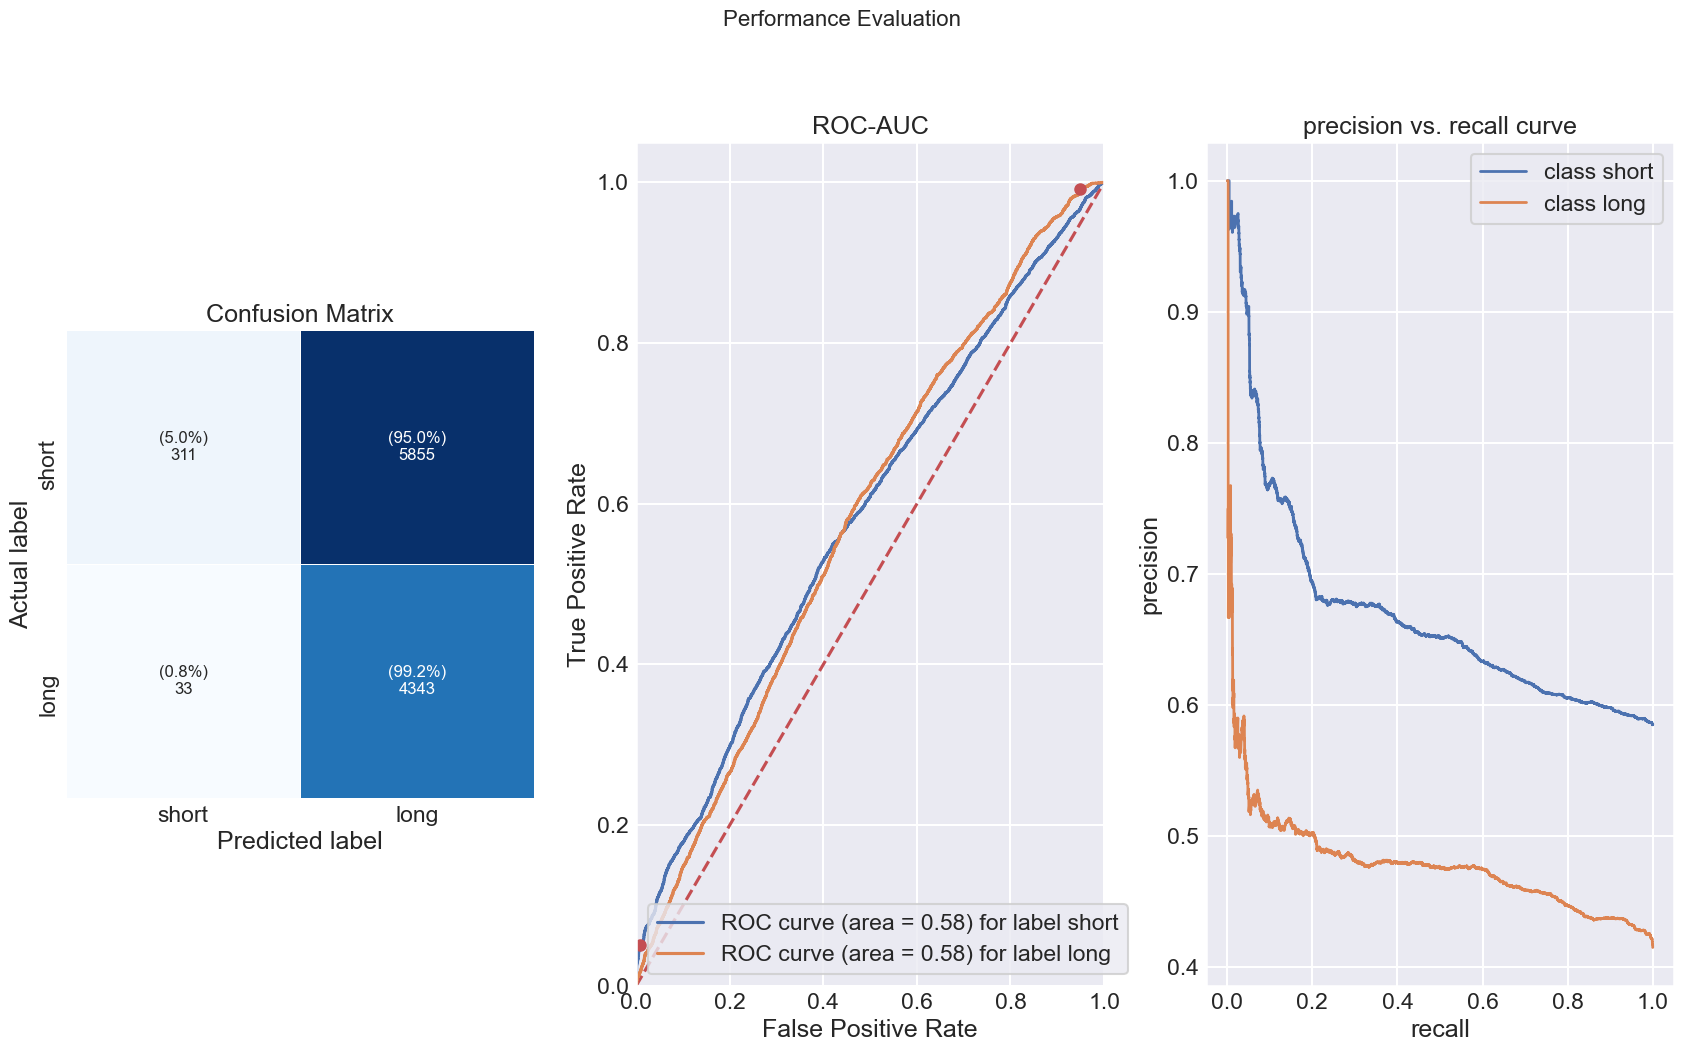

In [19]:
rf_clf, rf_clf_perf = run_rf_model(
    X_train, y_train, X_validate, y_validate, params=RF_PARAMS
)
agg_res["rf_multiclass_all_feat"] = format_results(rf_clf_perf)

In [20]:
def shap_imp(clf, X):
    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(X)

    fi0 = np.abs(shap_values[0]).mean(axis=0)
    fi1 = np.abs(shap_values[1]).mean(axis=0)
    fi = fi0 + fi1
    imp = pd.DataFrame({"feature": X.columns.tolist(), "mean": fi})
    imp = imp.set_index("feature")

    return imp, explainer, shap_values

## compare raw model with shap feature selection model

In [21]:
rf_imp, _, rf_shap_values = shap_imp(rf_clf, X_train)

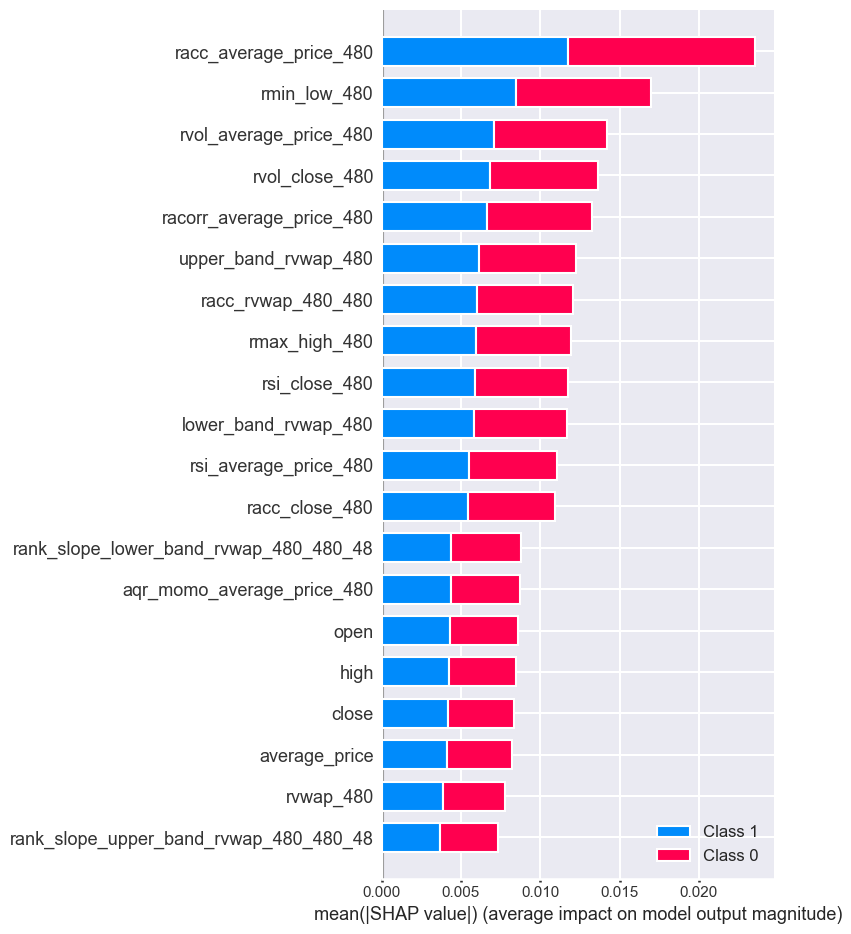

In [22]:
shap.summary_plot(rf_shap_values, X_validate)

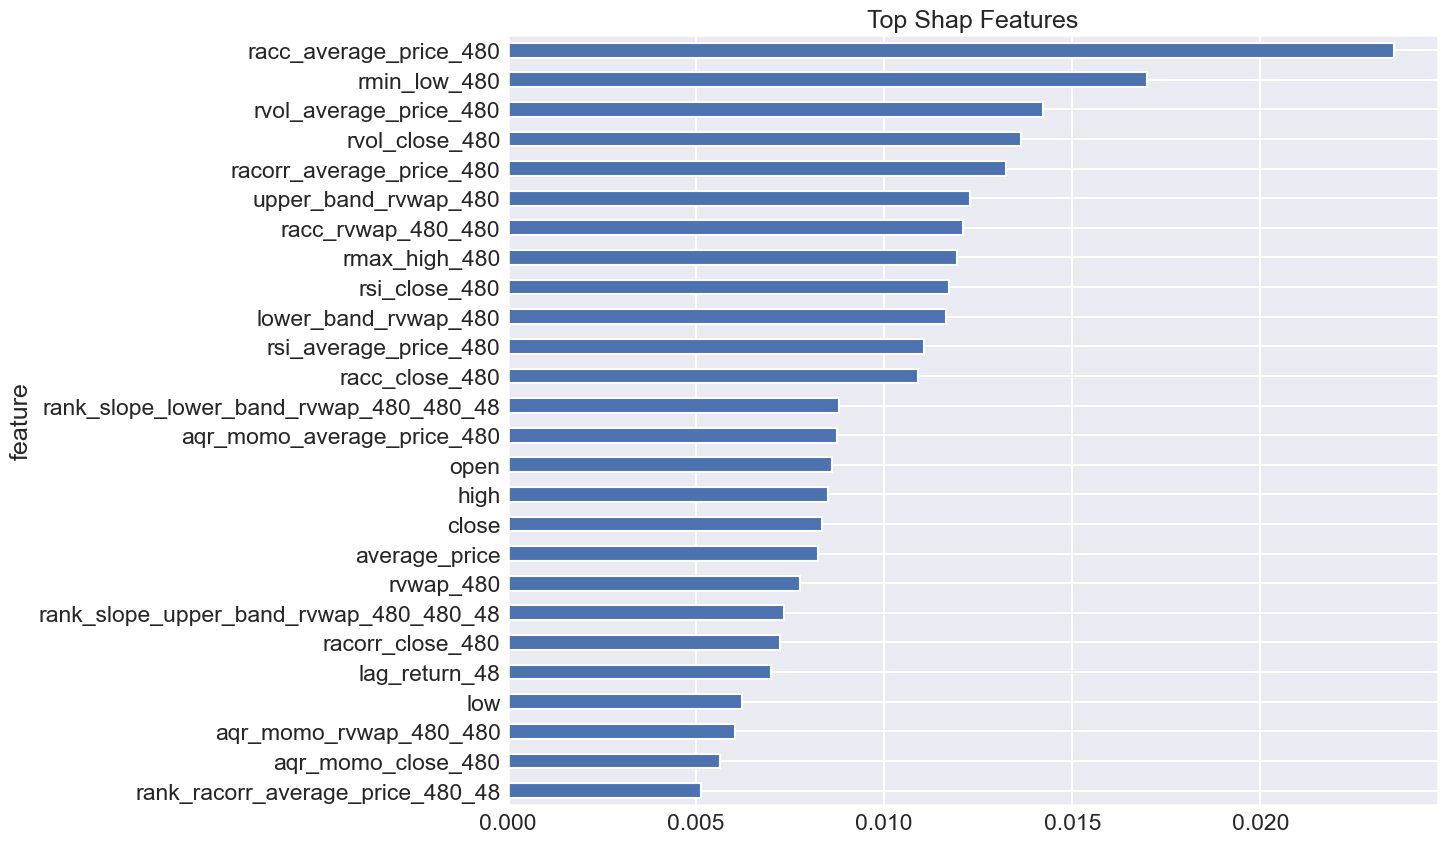

In [23]:
rf_top_shap_feat = get_and_plot_top_shap_feat(rf_imp)

{'accuracy': array([0.4427, 0.4427]),
 'cohens_kappa': 0.0377,
 'f1_score': array([0.0996, 0.5965]),
 'mcc': 0.1221,
 'precision': array([0.9053, 0.4264]),
 'recall': array([0.0527, 0.9922]),
 'specificity': array([0.9922, 0.0527])}


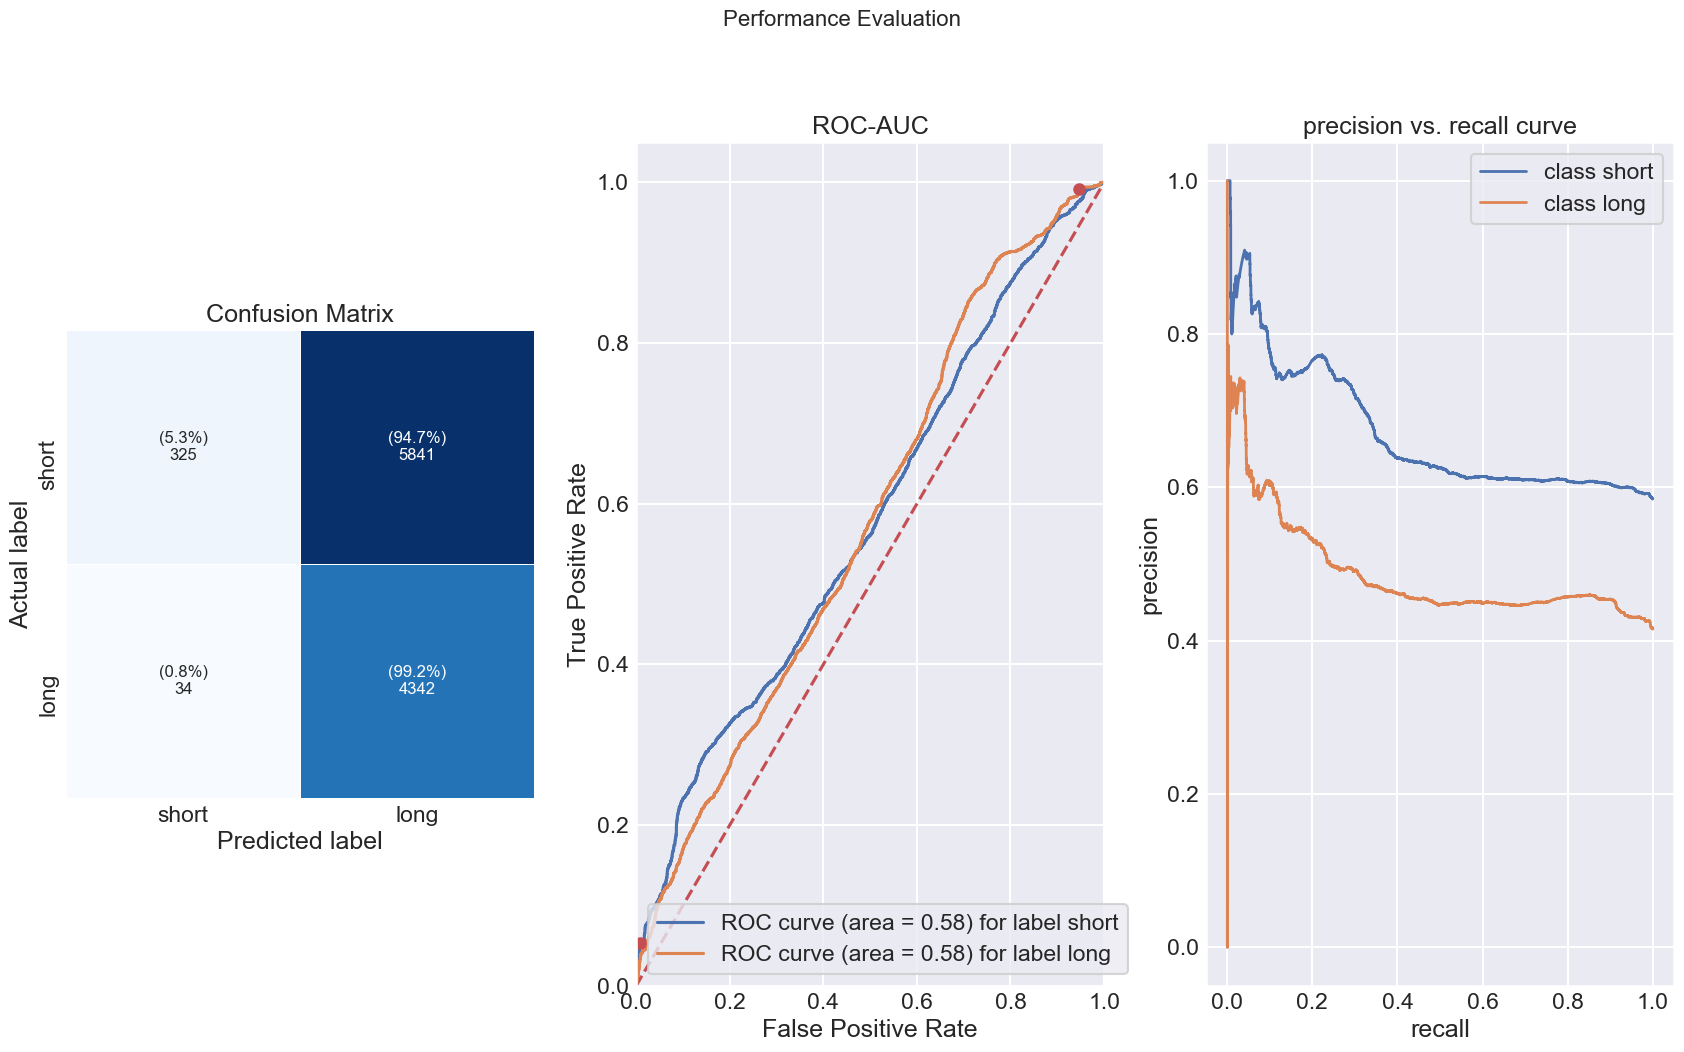

In [24]:
(X_train, y_train, X_validate, y_validate, X_test, y_test,) = make_model_datasets(
    outcome_df=binary_outcomes,
    df_train_=df_train,
    df_validate_=df_validate,
    df_test_=df_test,
    feature_cols=rf_top_shap_feat.index,
    y_col=Y_COL,
)

rf_clf, rf_clf_perf = run_rf_model(
    X_train, y_train, X_validate, y_validate, params=RF_PARAMS
)
agg_res["rf_multiclass_shap_feat"] = format_results(rf_clf_perf)

In [25]:
get_agg_results(agg_res)

,accuracy,precision,recall,mcc,specificity,f1_score,cohens_kappa
rf_multiclass_shap_feat,0.4427,0.6659,0.5224,0.1221,0.5224,0.3481,0.0377
rf_multiclass_all_feat,0.4415,0.6650,0.5214,0.1190,0.5214,0.3458,0.0360


## feature engineering fracdiff

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
def is_adf_stationary(s, thresh="5%"):
    r = adfuller(s)
    result = pd.concat(
        [pd.Series(r[:2], index=["test_statistic", "p_value"]), pd.Series(r[4])]
    )

    if result["p_value"] < result[thresh]:
        return True
    return False

In [28]:
(X_train, y_train, X_validate, y_validate, X_test, y_test,) = make_model_datasets(
    outcome_df=binary_outcomes,
    df_train_=df_train,
    df_validate_=df_validate,
    df_test_=df_test,
    feature_cols=feature_cols,
    y_col=Y_COL,
)

is_stationary_data = X_train.apply(is_adf_stationary)
is_stationary_data

open                                      False
high                                      False
low                                       False
close                                     False
up                                        False
down                                      False
volume                                    False
average_price                             False
rvwap_480                                 False
upper_band_rvwap_480                      False
lower_band_rvwap_480                      False
ibs                                       False
rmin_low_480                              False
rmax_high_480                             False
slope_lower_band_rvwap_480_480            False
slope_upper_band_rvwap_480_480            False
slope_rmin_low_480_480                    False
slope_rmax_high_480_480                   False
racc_close_480                            False
aqr_momo_close_480                        False
racc_average_price_480                  

In [29]:
from fracdiff.sklearn import FracdiffStat, Fracdiff

In [30]:
f = FracdiffStat()
X_train_fracdiff = f.fit_transform(X_train)
ds = pd.Series(f.d_, index=X_train.columns).apply(quantize, args=(-4,))
ds

open                                      0.8047
high                                      0.8047
low                                       0.8047
close                                     0.8047
up                                        0.0000
down                                      0.0000
volume                                    0.0000
average_price                             0.8047
rvwap_480                                 0.9844
upper_band_rvwap_480                      0.9844
lower_band_rvwap_480                      0.9844
ibs                                       0.0000
rmin_low_480                              0.9062
rmax_high_480                             0.9375
slope_lower_band_rvwap_480_480            0.0000
slope_upper_band_rvwap_480_480            0.0000
slope_rmin_low_480_480                    0.0000
slope_rmax_high_480_480                   0.0000
racc_close_480                            0.8906
aqr_momo_close_480                        0.0000
racc_average_price_4

In [31]:
X_train_fracdiff_df = pd.DataFrame(
    X_train_fracdiff, columns=X_train.columns, index=X_train.index
)
cprint(X_train_fracdiff_df)

*******************************************************************************
dataframe information
-------------------------------------------------------------------------------
HEAD num rows: 5
                           open        high         low       close  \
datetime                                                              
2007-01-03 06:30:00  142.250000  142.450000  141.930000  142.100000   
2007-01-03 07:00:00   27.633203   28.232266   27.780703   28.403906   
2007-01-03 07:30:00   17.225508   16.648229   17.139170   16.524249   
2007-01-03 08:00:00   12.080356   12.074136   12.219957   12.166864   
2007-01-03 08:30:00    9.724395    9.782765    9.771242    9.797646   

                            up       down      volume  average_price  \
datetime                                                               
2007-01-03 06:30:00  4572400.0  4991700.0   9564100.0     142.182500   
2007-01-03 07:00:00  6345300.0  4170800.0  10516100.0      28.012520   
2007-01-03 07:3

In [32]:
for col in X_train.columns:
    f = Fracdiff(ds.loc[col])
    X_validate[col] = f.fit_transform(X_validate[[col]])
cprint(X_validate)

*******************************************************************************
dataframe information
-------------------------------------------------------------------------------
HEAD num rows: 5
                           open        high         low       close        up  \
datetime                                                                        
2013-01-02 06:30:00  145.110000  145.580000  144.940000  145.470000  17041711   
2013-01-02 07:00:00   28.699983   28.441774   28.536782   28.170291   7296553   
2013-01-02 07:30:00   16.767699   16.734203   16.762467   16.732538   6297143   
2013-01-02 08:00:00   12.189366   12.224751   12.227484   12.337894   4608312   
2013-01-02 08:30:00    9.844487    9.732138    9.788171    9.627625   3855576   

                         down    volume  average_price   rvwap_480  \
datetime                                                             
2013-01-02 06:30:00  15353256  32394967     145.275000  140.858814   
2013-01-02 07:00:00   7

{'accuracy': array([0.4446, 0.4446]),
 'cohens_kappa': 0.0335,
 'f1_score': array([0.1391, 0.5901]),
 'mcc': 0.0822,
 'precision': array([0.7449, 0.4254]),
 'recall': array([0.0767, 0.963 ]),
 'specificity': array([0.963 , 0.0767])}


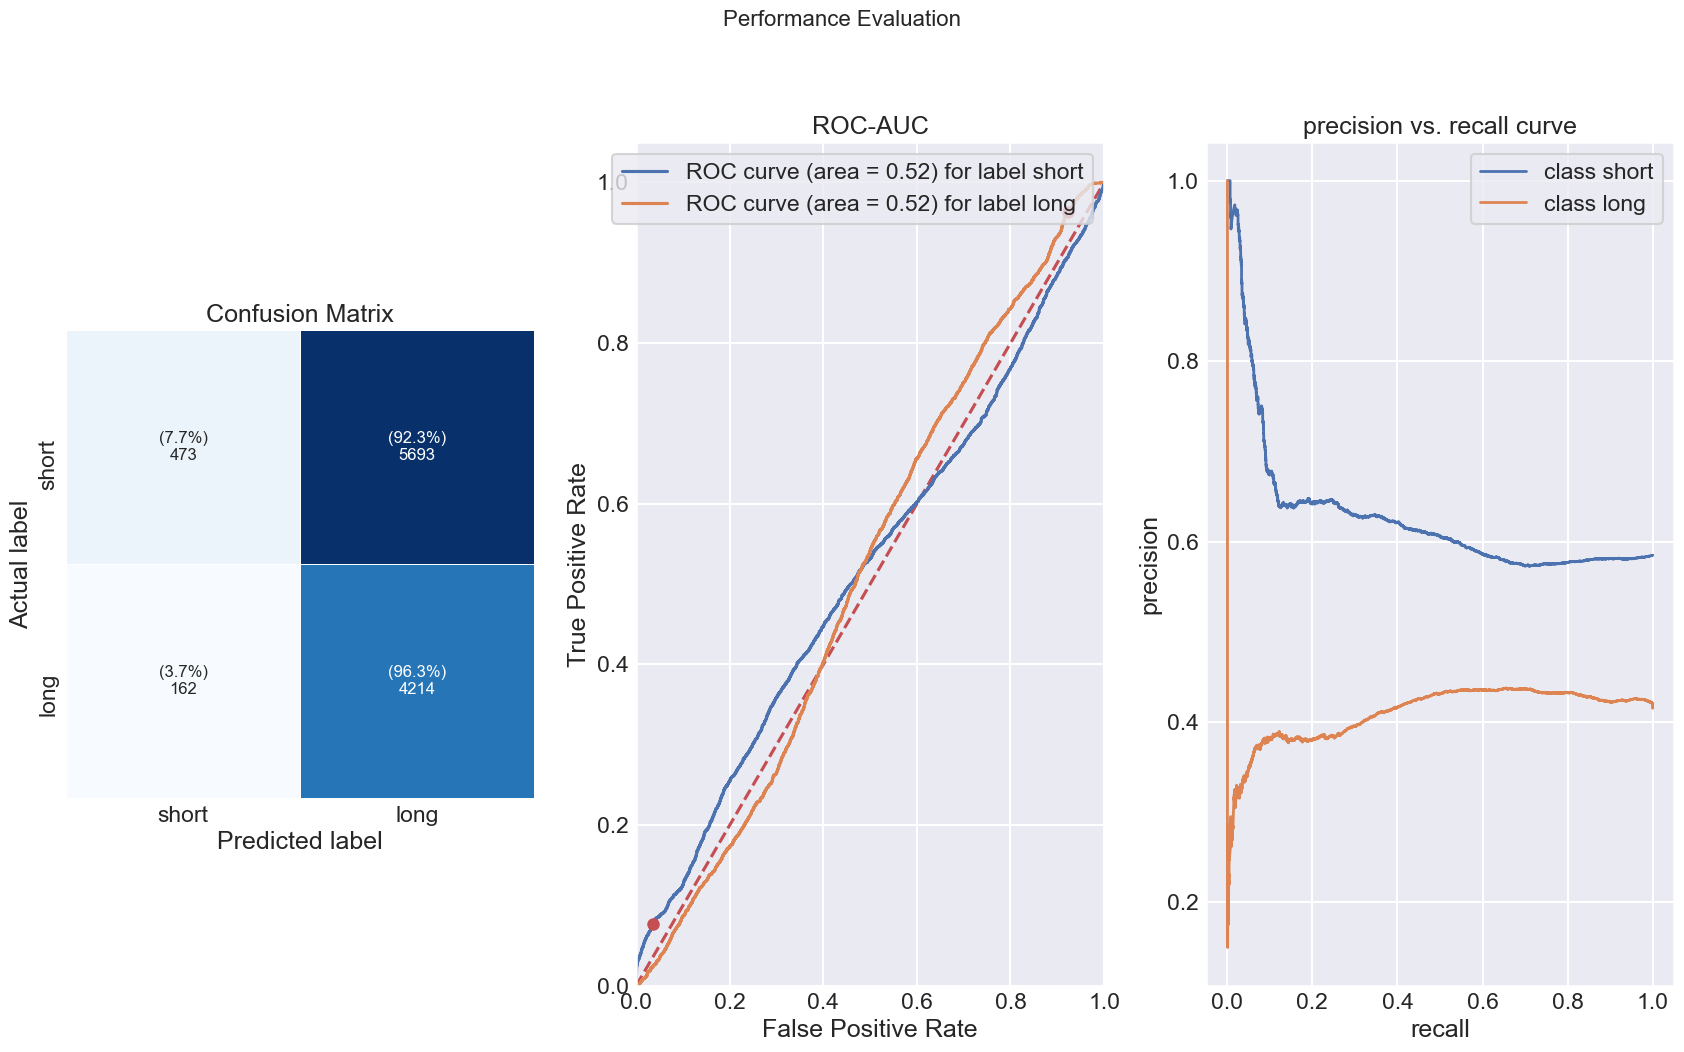

In [33]:
rf_clf, rf_clf_perf = run_rf_model(
    X_train_fracdiff_df, y_train, X_validate, y_validate, params=RF_PARAMS
)
agg_res["rf_multiclass_all_feat_fracdiff"] = format_results(rf_clf_perf)

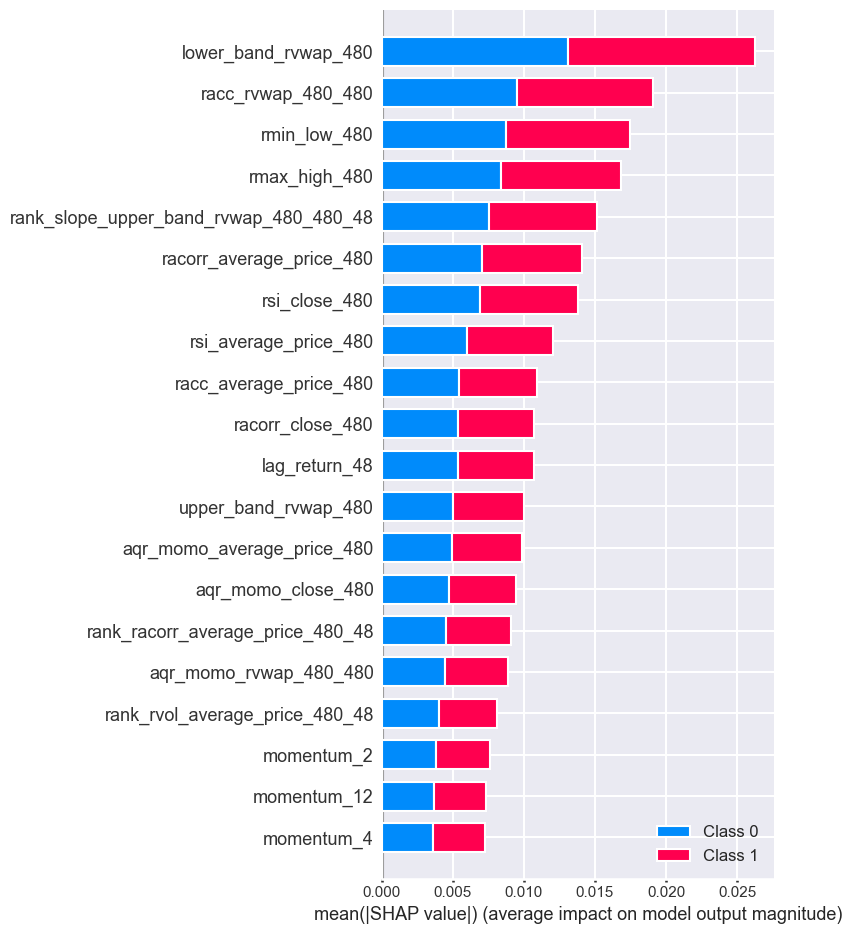

In [34]:
rf_imp, explainer, shap_values = shap_imp(rf_clf, X_train_fracdiff_df)
shap.summary_plot(shap_values, X_validate)

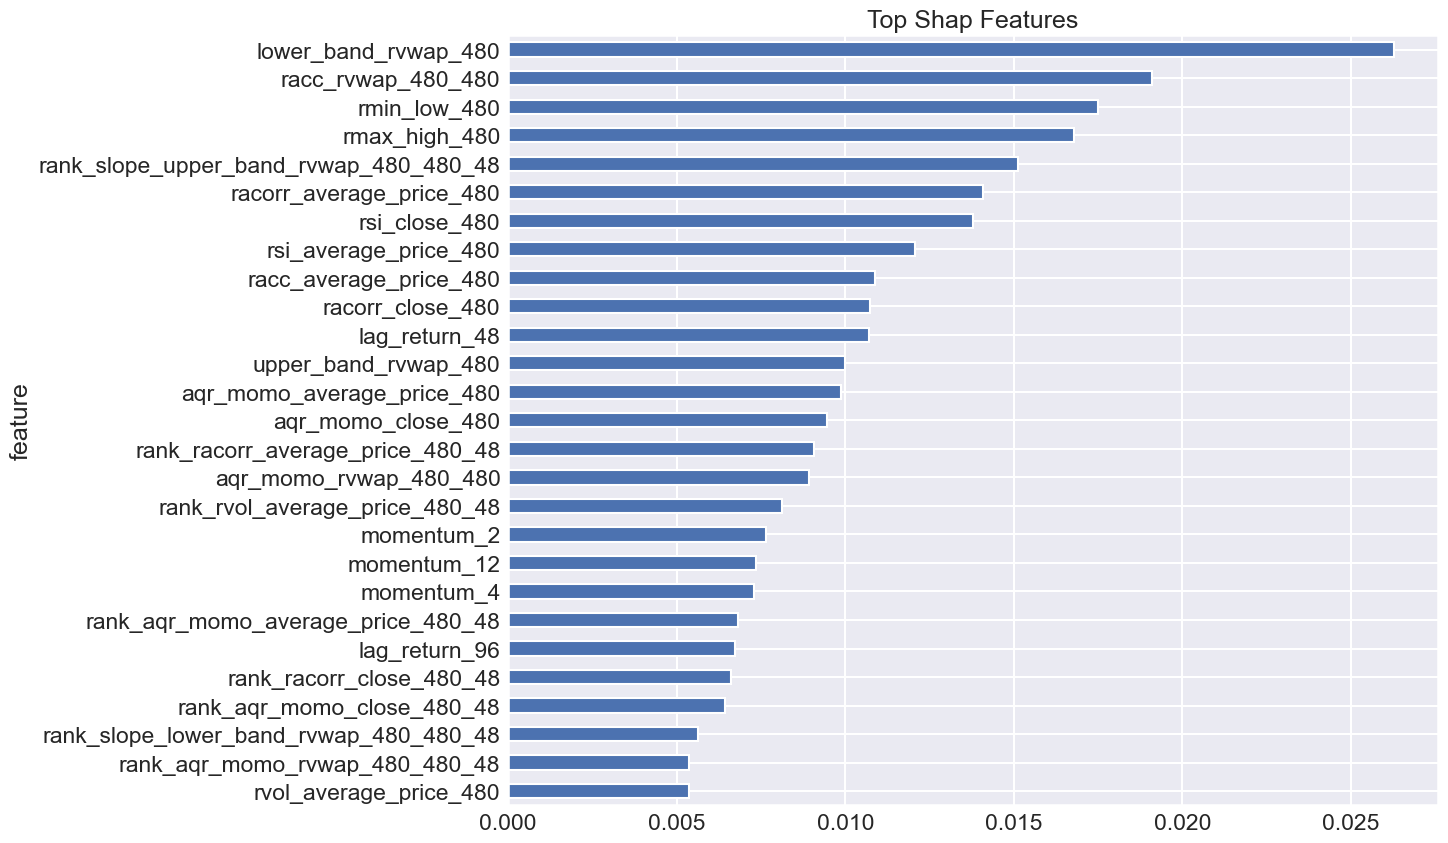

In [35]:
rf_top_shap_feat = get_and_plot_top_shap_feat(rf_imp)

{'accuracy': array([0.4427, 0.4427]),
 'cohens_kappa': 0.0316,
 'f1_score': array([0.1298, 0.5901]),
 'mcc': 0.0806,
 'precision': array([0.7487, 0.4247]),
 'recall': array([0.071 , 0.9664]),
 'specificity': array([0.9664, 0.071 ])}


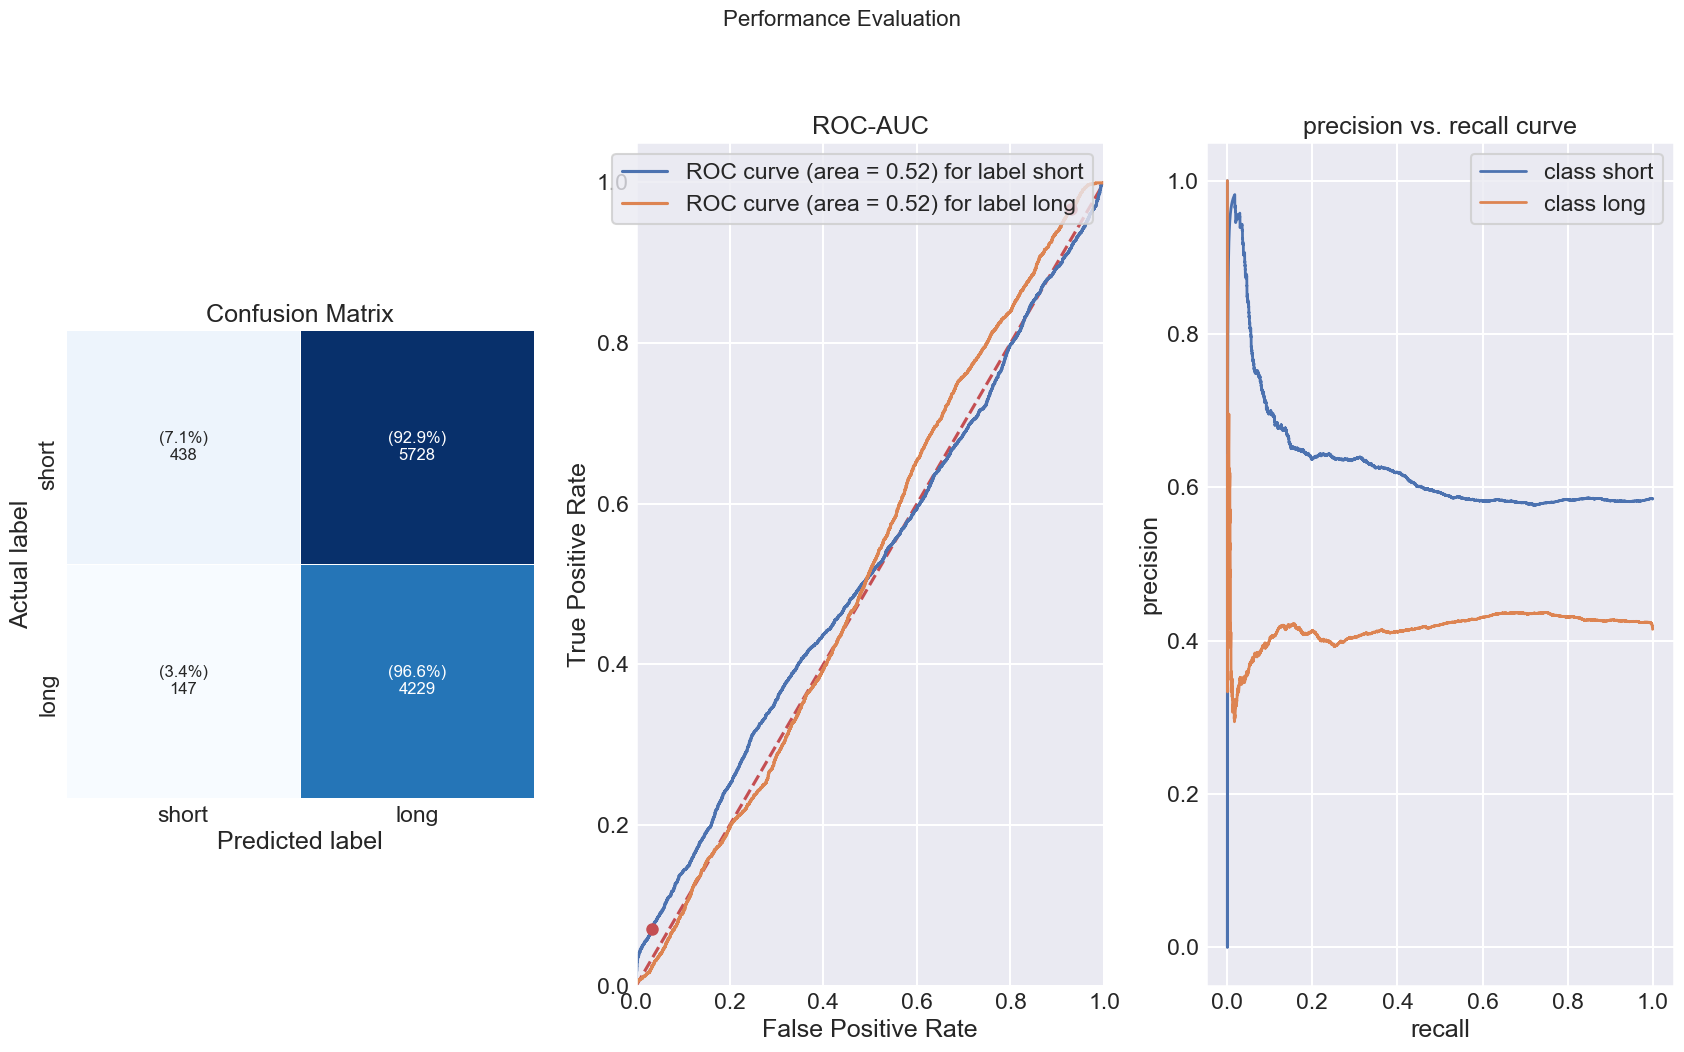

In [36]:
rf_clf, rf_clf_perf = run_rf_model(
    X_train_fracdiff_df[rf_top_shap_feat.index],
    y_train,
    X_validate[rf_top_shap_feat.index],
    y_validate,
    params=RF_PARAMS,
)
agg_res["rf_multiclass_shap_feat_fracdiff"] = format_results(rf_clf_perf)

In [37]:
pd.DataFrame.from_dict(agg_res).T

,accuracy,precision,recall,mcc,specificity,f1_score,cohens_kappa
rf_multiclass_all_feat,0.4415,0.6650,0.5214,0.1190,0.5214,0.3458,0.0360
rf_multiclass_shap_feat,0.4427,0.6659,0.5224,0.1221,0.5224,0.3481,0.0377
rf_multiclass_all_feat_fracdiff,0.4446,0.5852,0.5199,0.0822,0.5199,0.3646,0.0335
rf_multiclass_shap_feat_fracdiff,0.4427,0.5867,0.5187,0.0806,0.5187,0.3599,0.0316


## feature engineering fracdiff only nonranked columns

In [38]:
rank_features = pd.Index([x for x in data.columns if "rank" in x])
rank_features

Index(['rank_up_48', 'rank_down_48', 'rank_volume_48', 'rank_average_price_48',
       'rank_rvwap_480_48', 'rank_upper_band_rvwap_480_48',
       'rank_lower_band_rvwap_480_48', 'rank_ibs_48', 'rank_rmin_low_480_48',
       'rank_rmax_high_480_48', 'rank_slope_lower_band_rvwap_480_480_48',
       'rank_slope_upper_band_rvwap_480_480_48',
       'rank_slope_rmin_low_480_480_48', 'rank_slope_rmax_high_480_480_48',
       'rank_racc_close_480_48', 'rank_aqr_momo_close_480_48',
       'rank_racc_average_price_480_48', 'rank_aqr_momo_average_price_480_48',
       'rank_racc_rvwap_480_480_48', 'rank_aqr_momo_rvwap_480_480_48',
       'rank_rvol_close_480_48', 'rank_rvol_average_price_480_48',
       'rank_rsi_close_480_48', 'rank_rsi_average_price_480_48',
       'rank_racorr_close_480_48', 'rank_racorr_average_price_480_48'],
      dtype='object')

In [39]:
non_rank_features = data.columns.symmetric_difference(rank_features)
non_rank_features

Index(['aqr_momo_average_price_480', 'aqr_momo_close_480',
       'aqr_momo_rvwap_480_480', 'average_price', 'close', 'close_returns',
       'dollar_volume', 'down', 'high', 'ibs', 'interval_returns',
       'lag_return_1', 'lag_return_12', 'lag_return_2', 'lag_return_4',
       'lag_return_48', 'lag_return_96', 'low', 'lower_band_rvwap_480',
       'momentum_12', 'momentum_2', 'momentum_4', 'momentum_48', 'open',
       'racc_average_price_480', 'racc_close_480', 'racc_rvwap_480_480',
       'racorr_average_price_480', 'racorr_close_480', 'rmax_high_480',
       'rmin_low_480', 'rsi_average_price_480', 'rsi_close_480',
       'rvol_average_price_480', 'rvol_close_480', 'rvwap_480',
       'slope_lower_band_rvwap_480_480', 'slope_rmax_high_480_480',
       'slope_rmin_low_480_480', 'slope_upper_band_rvwap_480_480', 'up',
       'upper_band_rvwap_480', 'volume'],
      dtype='object')

In [40]:
(X_train, y_train, X_validate, y_validate, X_test, y_test,) = make_model_datasets(
    outcome_df=binary_outcomes,
    df_train_=df_train,
    df_validate_=df_validate,
    df_test_=df_test,
    feature_cols=feature_cols,
    y_col=Y_COL,
)

In [41]:
f = FracdiffStat()
X_train_fracdiff_nr = f.fit_transform(X_train[non_rank_features])
ds = pd.Series(f.d_, index=non_rank_features).apply(quantize, args=(-4,))
ds

aqr_momo_average_price_480        0.0000
aqr_momo_close_480                0.0000
aqr_momo_rvwap_480_480            0.0000
average_price                     0.8047
close                             0.8047
close_returns                     0.0000
dollar_volume                     0.0000
down                              0.0000
high                              0.8047
ibs                               0.0000
interval_returns                  0.0000
lag_return_1                      0.0000
lag_return_12                     0.0000
lag_return_2                      0.0000
lag_return_4                      0.0000
lag_return_48                     0.0000
lag_return_96                     0.0000
low                               0.8047
lower_band_rvwap_480              0.9844
momentum_12                       0.0000
momentum_2                        0.0000
momentum_4                        0.0000
momentum_48                       0.0000
open                              0.8047
racc_average_pri

In [42]:
X_train_fracdiff_nr_df = pd.DataFrame(
    X_train_fracdiff_nr, columns=non_rank_features, index=X_train.index
)
cprint(X_train_fracdiff_nr_df)

*******************************************************************************
dataframe information
-------------------------------------------------------------------------------
HEAD num rows: 5
                     aqr_momo_average_price_480  aqr_momo_close_480  \
datetime                                                              
2007-01-03 06:30:00                    0.000961            0.000802   
2007-01-03 07:00:00                    0.000898            0.000303   
2007-01-03 07:30:00                    0.000759            0.000601   
2007-01-03 08:00:00                    0.000995            0.000639   
2007-01-03 08:30:00                    0.000935            0.000561   

                     aqr_momo_rvwap_480_480  average_price       close  \
datetime                                                                 
2007-01-03 06:30:00                0.161769     142.182500  142.100000   
2007-01-03 07:00:00                0.155730      28.012520   28.403906   
2007-01

In [43]:
X_train_mrg = pd.concat(
    [X_train[rank_features], X_train_fracdiff_nr_df], axis=1
).drop_duplicates()
cprint(X_train_mrg)

*******************************************************************************
dataframe information
-------------------------------------------------------------------------------
HEAD num rows: 5
                     rank_up_48  rank_down_48  rank_volume_48  \
datetime                                                        
2007-01-03 06:30:00    0.000000      0.000000        0.000000   
2007-01-03 07:00:00    0.000000      0.021277        0.000000   
2007-01-03 07:30:00    0.170213      0.085106        0.127660   
2007-01-03 08:00:00    0.468085      0.425532        0.425532   
2007-01-03 08:30:00    0.404255      0.638298        0.489362   

                     rank_average_price_48  rank_rvwap_480_48  \
datetime                                                        
2007-01-03 06:30:00               0.617021                0.0   
2007-01-03 07:00:00               0.106383                0.0   
2007-01-03 07:30:00               0.000000                0.0   
2007-01-03 08:00:00 

In [44]:
for non_rank_col in non_rank_features:
    f = Fracdiff(ds.loc[non_rank_col])
    X_validate[non_rank_col] = f.fit_transform(X_validate[[non_rank_col]])
    X_test[non_rank_col] = f.fit_transform(X_test[[non_rank_col]])
cprint(X_validate)

*******************************************************************************
dataframe information
-------------------------------------------------------------------------------
HEAD num rows: 5
                           open        high         low       close        up  \
datetime                                                                        
2013-01-02 06:30:00  145.110000  145.580000  144.940000  145.470000  17041711   
2013-01-02 07:00:00   28.699983   28.441774   28.536782   28.170291   7296553   
2013-01-02 07:30:00   16.767699   16.734203   16.762467   16.732538   6297143   
2013-01-02 08:00:00   12.189366   12.224751   12.227484   12.337894   4608312   
2013-01-02 08:30:00    9.844487    9.732138    9.788171    9.627625   3855576   

                         down    volume  average_price   rvwap_480  \
datetime                                                             
2013-01-02 06:30:00  15353256  32394967     145.275000  140.858814   
2013-01-02 07:00:00   7

## run model with all features fracdiff nonranked

{'accuracy': array([0.5136, 0.5136]),
 'cohens_kappa': 0.0751,
 'f1_score': array([0.4782, 0.5444]),
 'mcc': 0.0841,
 'precision': array([0.6417, 0.4453]),
 'recall': array([0.3811, 0.7002]),
 'specificity': array([0.7002, 0.3811])}


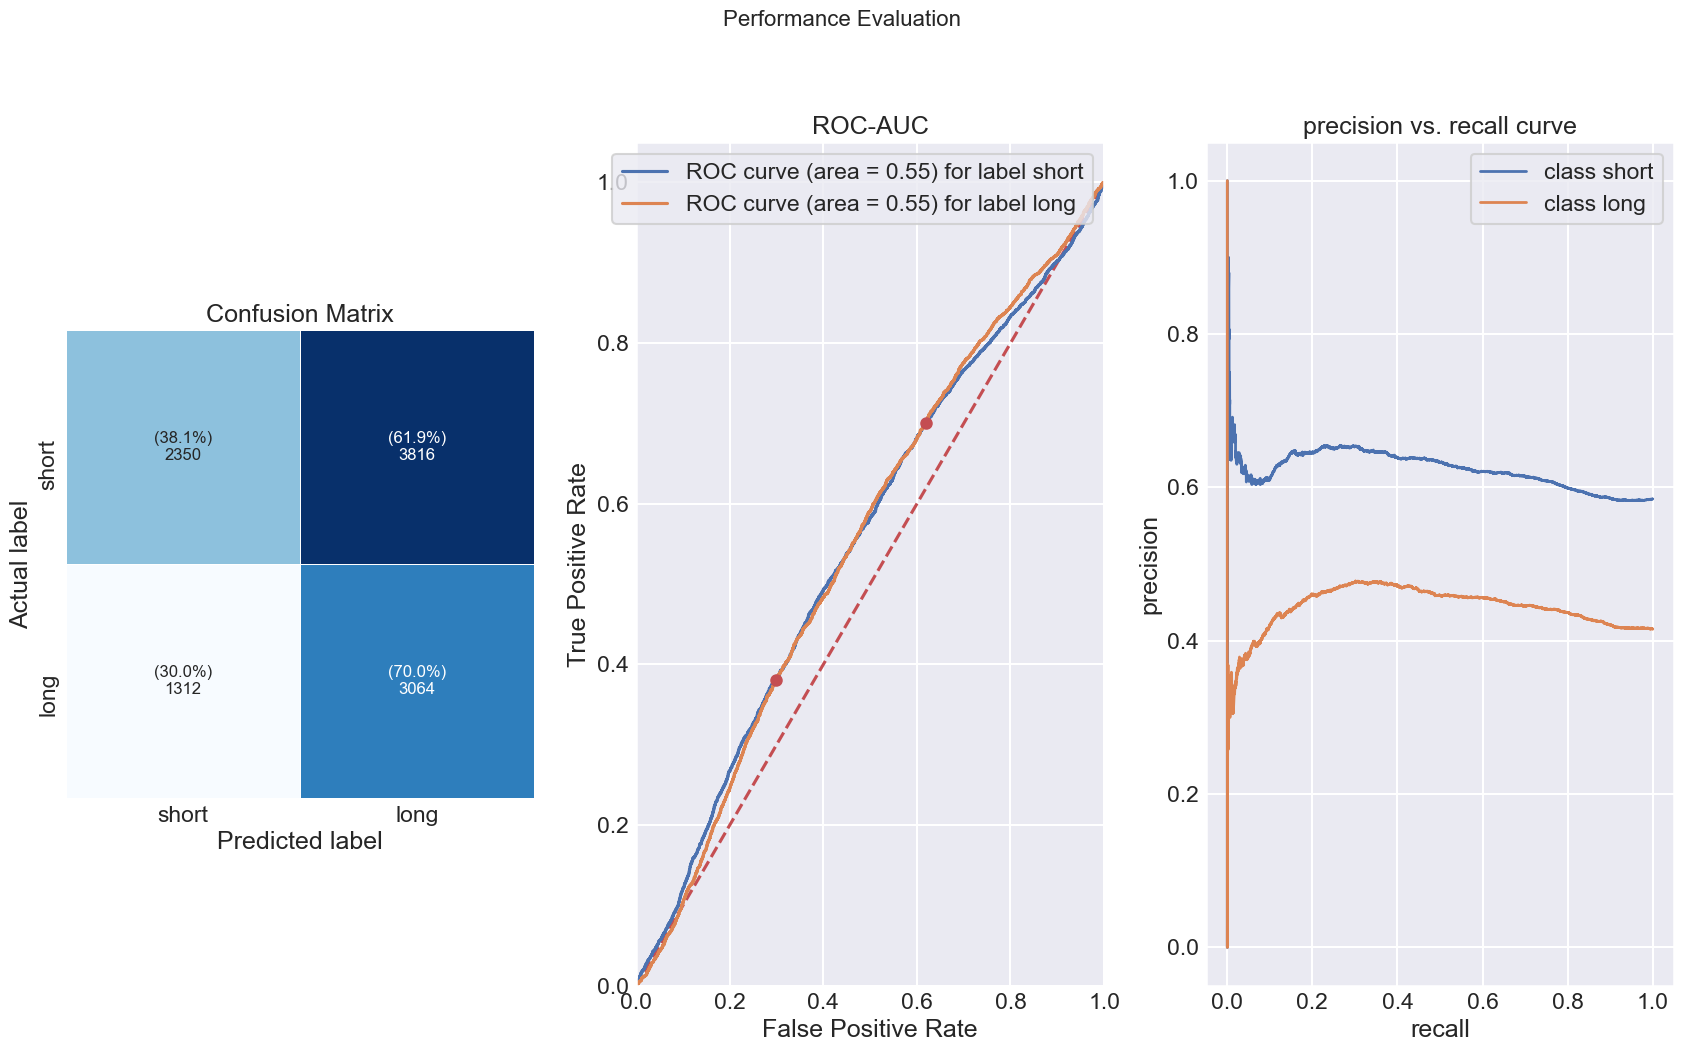

In [45]:
rf_clf, rf_clf_perf = run_rf_model(
    X_train_mrg, y_train, X_validate, y_validate, params=RF_PARAMS
)
agg_res["rf_multiclass_all_feat_fracdiff_non_rank"] = format_results(rf_clf_perf)

### get shap features

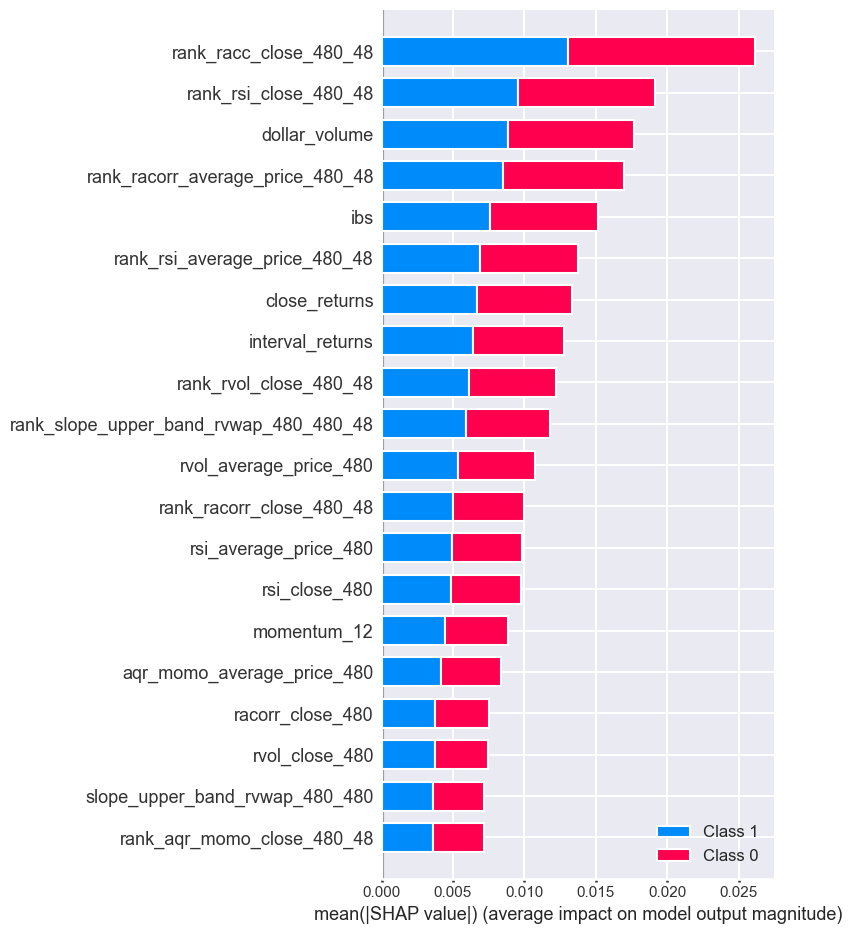

In [46]:
rf_imp, explainer, shap_values = shap_imp(rf_clf, X_train_mrg)
shap.summary_plot(shap_values, X_validate)

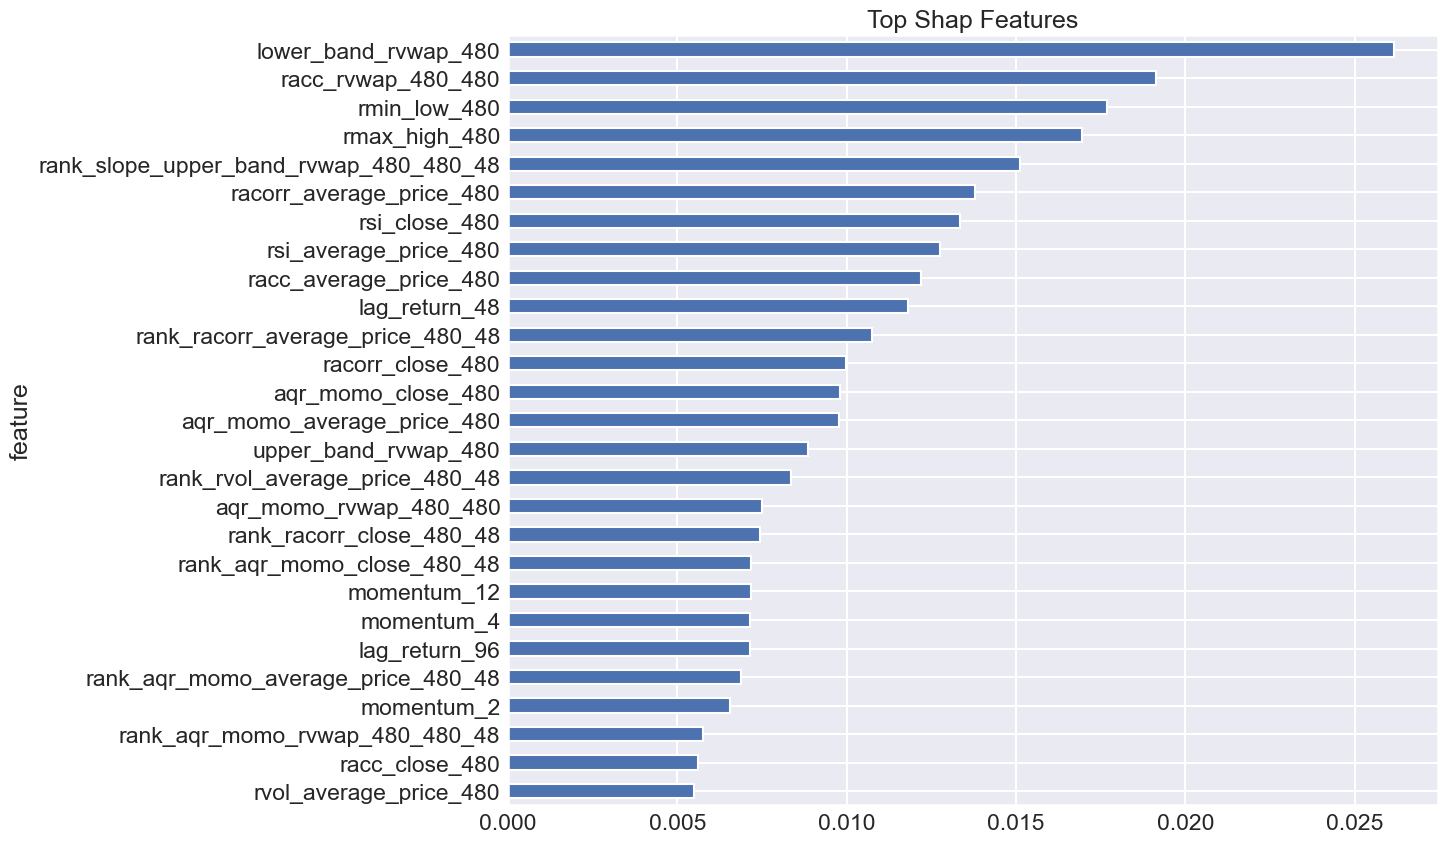

In [47]:
rf_top_shap_feat = get_and_plot_top_shap_feat(rf_imp)

## run model with fracdiff nonranked features

{'accuracy': array([0.4437, 0.4437]),
 'cohens_kappa': 0.0297,
 'f1_score': array([0.1479, 0.587 ]),
 'mcc': 0.0685,
 'precision': array([0.7099, 0.4242]),
 'recall': array([0.0825, 0.9525]),
 'specificity': array([0.9525, 0.0825])}


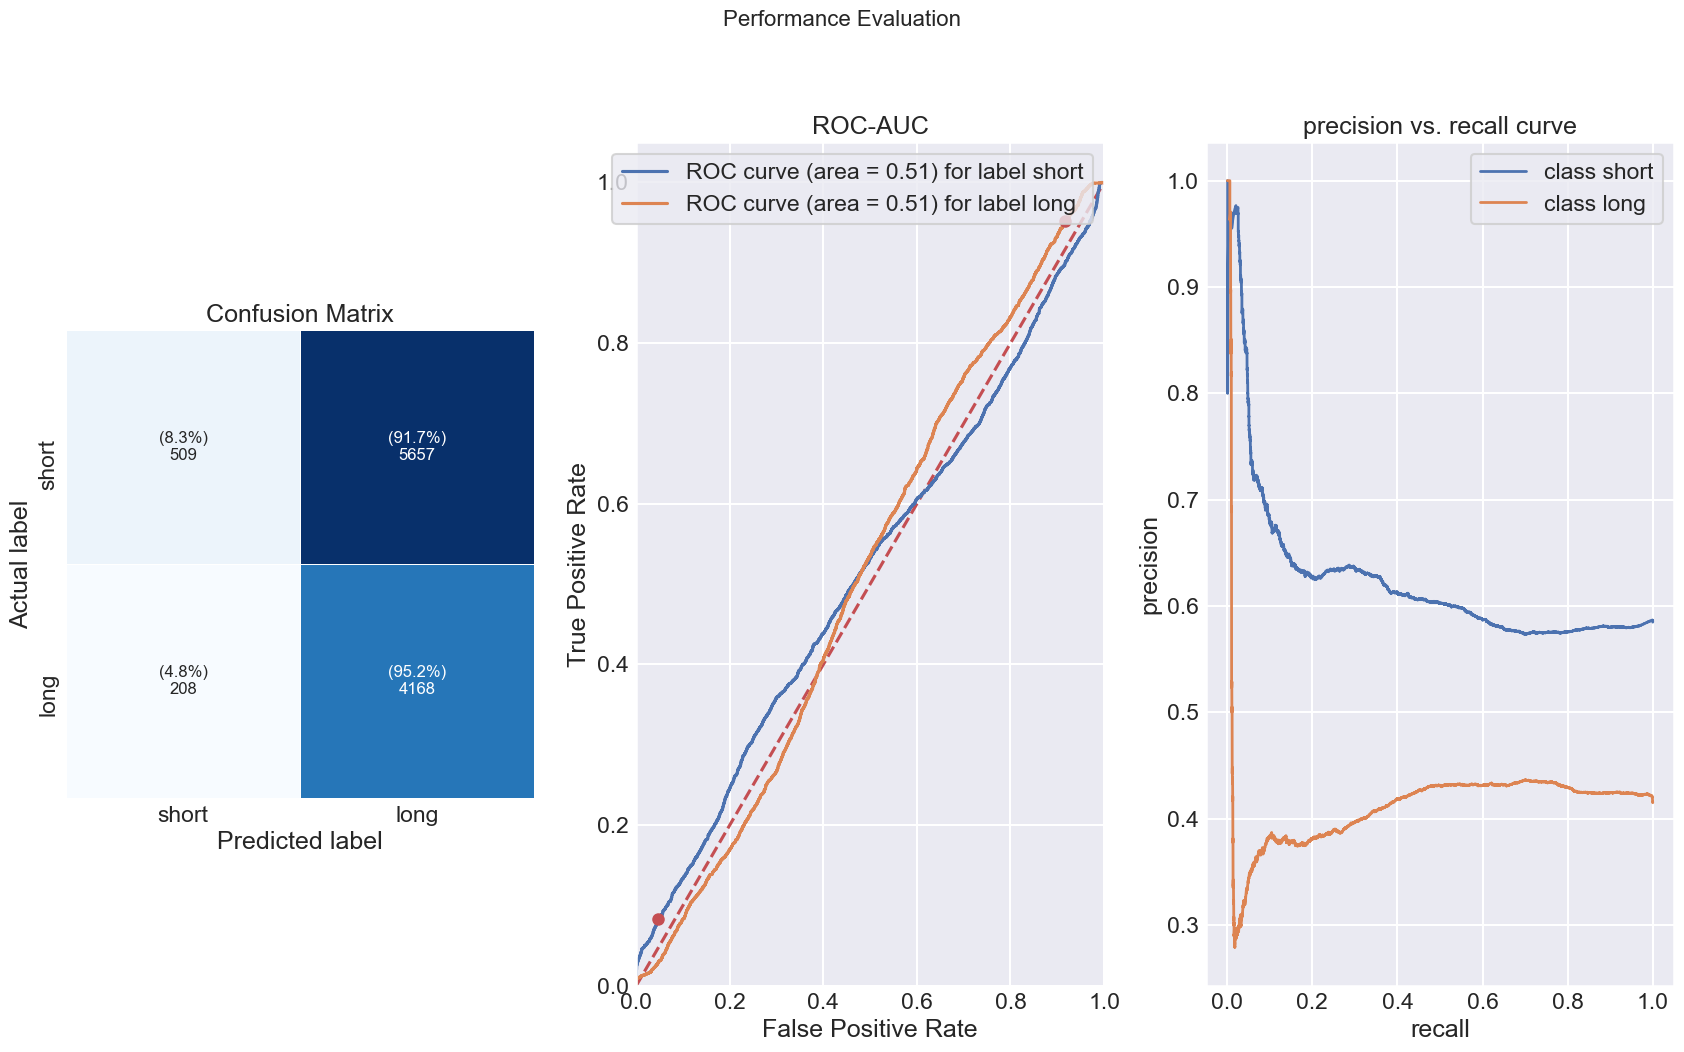

In [48]:
rf_clf, rf_clf_perf = run_rf_model(
    X_train_mrg[rf_top_shap_feat.index],
    y_train,
    X_validate[rf_top_shap_feat.index],
    y_validate,
    params=RF_PARAMS,
)
agg_res["rf_multiclass_shap_feat_fracdiff_nr"] = format_results(rf_clf_perf)

In [49]:
get_agg_results(agg_res)

,accuracy,precision,recall,mcc,specificity,f1_score,cohens_kappa
rf_multiclass_all_feat_fracdiff_non_rank,0.5136,0.5435,0.5407,0.0841,0.5407,0.5113,0.0751
rf_multiclass_shap_feat_fracdiff_nr,0.4437,0.5671,0.5175,0.0685,0.5175,0.3674,0.0297
rf_multiclass_all_feat_fracdiff,0.4446,0.5852,0.5199,0.0822,0.5199,0.3646,0.0335
rf_multiclass_shap_feat_fracdiff,0.4427,0.5867,0.5187,0.0806,0.5187,0.3599,0.0316
rf_multiclass_shap_feat,0.4427,0.6659,0.5224,0.1221,0.5224,0.3481,0.0377
rf_multiclass_all_feat,0.4415,0.6650,0.5214,0.1190,0.5214,0.3458,0.0360


## Scale features first

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [51]:
def run_rf_model(
    X_train_, y_train_, X_test_, y_test_, model=None, params=None, classes=CLASSES
):
    if model is None:
        if params is not None:
            rf_clf_ = make_rf_clf(params=params)
        else:
            rf_clf_ = make_rf_clf()
    else:
        rf_clf_ = model

    rf_clf_.fit(X_train_, y_train_)

    rf_clf_perf = performance_evaluation_report_multiclass(
        rf_clf_,
        X_test_,
        y_test_,
        show_plot=True,
        show_pr_curve=True,
        average=None,
        labels=classes,
    )
    pprint(rf_clf_perf)
    return rf_clf_, rf_clf_perf

In [52]:
pipe = make_pipeline(StandardScaler(), make_rf_clf(RF_PARAMS))

{'accuracy': array([0.525, 0.525]),
 'cohens_kappa': 0.0495,
 'f1_score': array([0.5629, 0.48  ]),
 'mcc': 0.0502,
 'precision': array([0.6096, 0.4399]),
 'recall': array([0.5229, 0.5281]),
 'specificity': array([0.5281, 0.5229])}


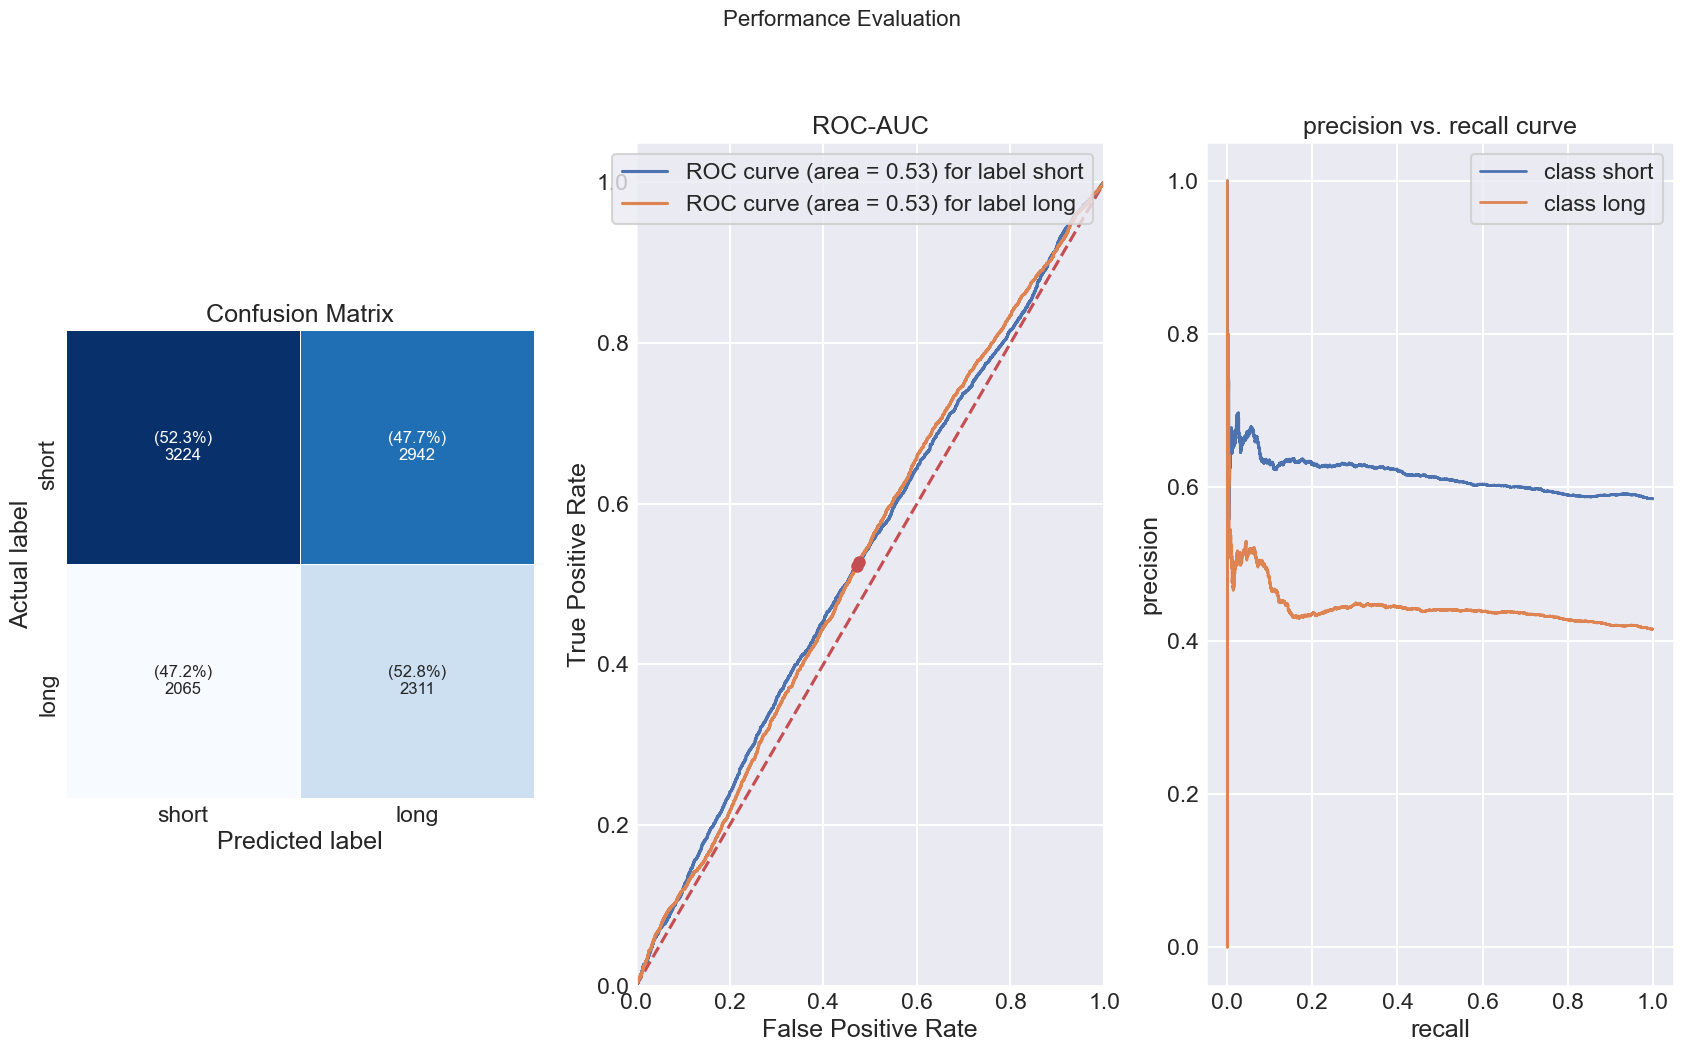

In [53]:
rf_clf, rf_clf_perf = run_rf_model(
    X_train_mrg, y_train, X_validate, y_validate, model=pipe, params=RF_PARAMS
)
agg_res["rf_multiclass_all_feat_fracdiff_non_rank_scaled"] = format_results(rf_clf_perf)

## run model with ensemble classifier

In [54]:
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    VotingClassifier,
    StackingClassifier,
)
from sklearn.preprocessing import RobustScaler, StandardScaler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import make_pipeline
from sklearn.decomposition import PCA


voting_clf = VotingClassifier(
    estimators=[
        (
            "lgbm",
            LGBMClassifier(
                boosting_type="gbdt",
                class_weight=None,
                colsample_bytree=1.0,
                importance_type="split",
                learning_rate=0.1,
                max_depth=-1,
                min_child_samples=20,
                min_child_weight=0.001,
                min_split_gain=0.0,
                n_estimators=100,
                n_jobs=-1,
                num_leaves=31,
                objective=None,
                random_state=123,
                reg_alpha=0.0,
                reg_lambda=0.0,
                silent="warn",
                subsample=1.0,
                subsample_for_bin=200000,
                subsample_freq=0,
            ),
        ),
        (
            "rf",
            make_rf_clf(params=RF_PARAMS),
        ),
        (
            "lr",
            LogisticRegression(
                C=1.0,
                class_weight=None,
                dual=False,
                fit_intercept=True,
                intercept_scaling=1,
                l1_ratio=None,
                max_iter=1000,
                multi_class="auto",
                n_jobs=None,
                penalty="l2",
                random_state=123,
                solver="lbfgs",
                tol=0.0001,
                verbose=0,
                warm_start=False,
            ),
        ),
    ],
    voting="soft",
)


{'accuracy': array([0.5095, 0.5095]),
 'cohens_kappa': 0.0307,
 'f1_score': array([0.5325, 0.4841]),
 'mcc': 0.0316,
 'precision': array([0.6016, 0.4296]),
 'recall': array([0.4776, 0.5544]),
 'specificity': array([0.5544, 0.4776])}


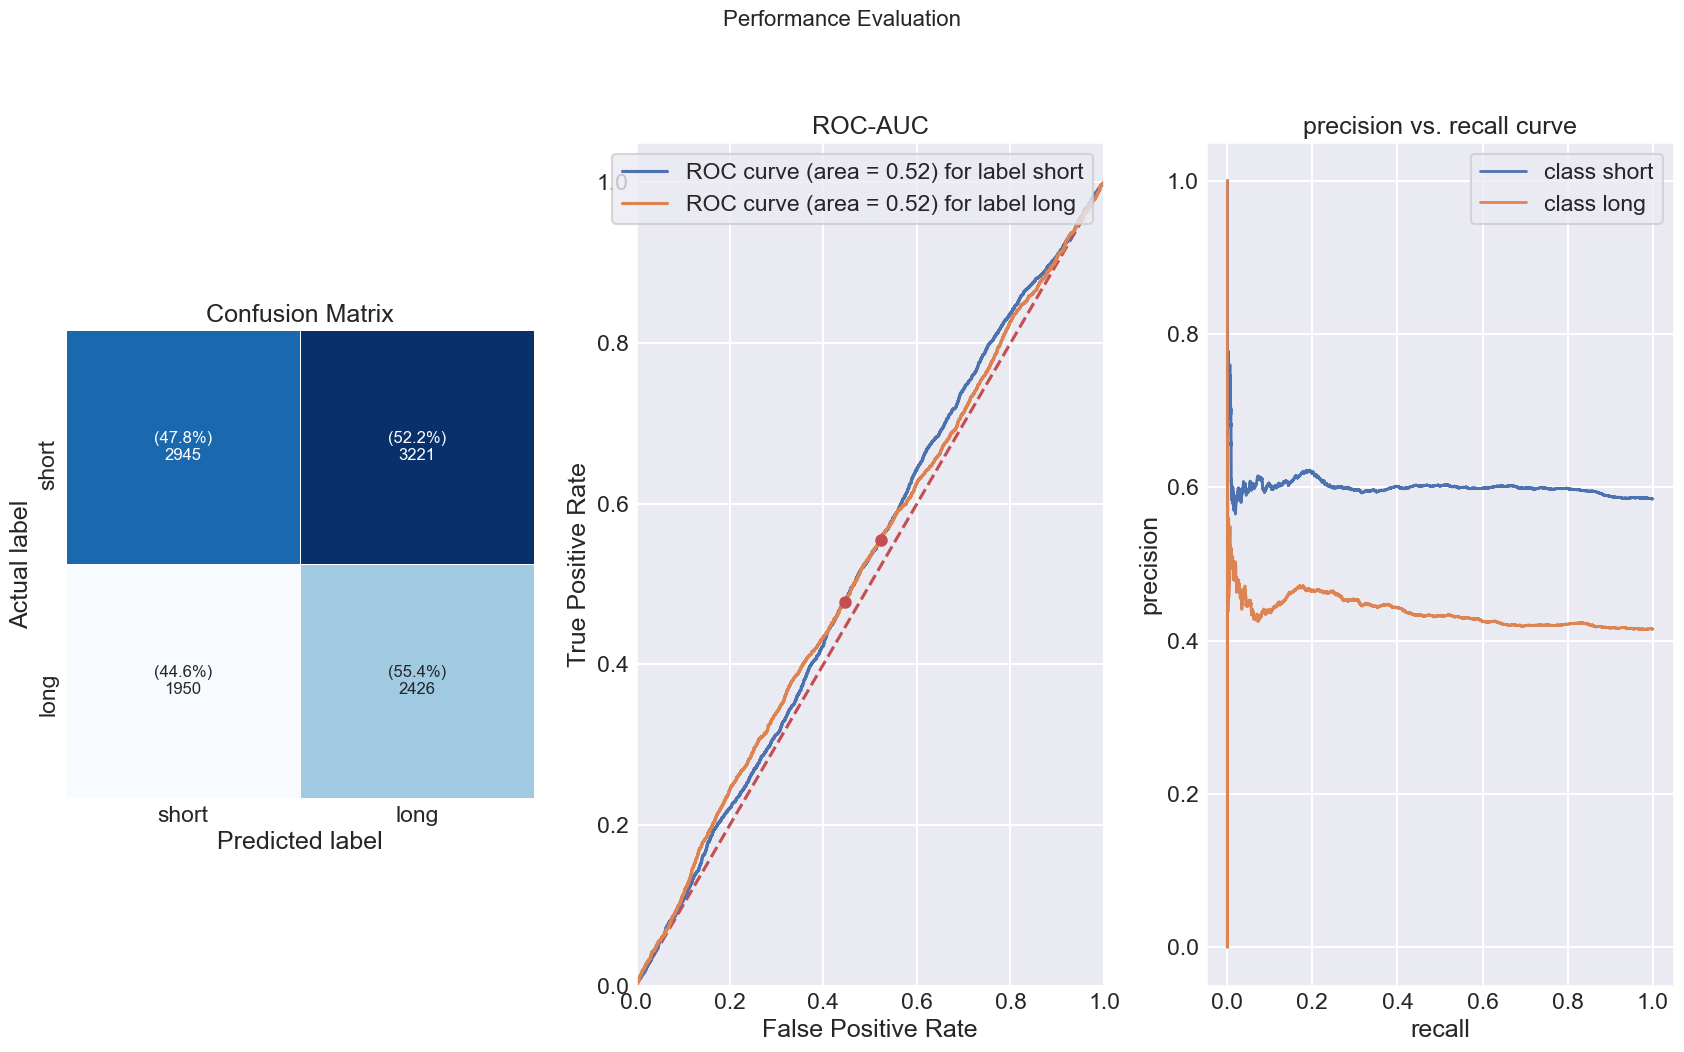

In [55]:
rf_clf, rf_clf_perf = run_rf_model(
    X_train_mrg, y_train, X_validate, y_validate, model=voting_clf, params=RF_PARAMS
)
agg_res["rf_multiclass_all_feat_fracdiff_non_rank_voting"] = format_results(rf_clf_perf)

## run fracdiff nonranked data with stacked classifier

In [56]:
estimators = [
    (
        "lgbm",
        LGBMClassifier(
            boosting_type="gbdt",
            class_weight=None,
            colsample_bytree=1.0,
            importance_type="split",
            learning_rate=0.1,
            max_depth=-1,
            min_child_samples=20,
            min_child_weight=0.001,
            min_split_gain=0.0,
            n_estimators=100,
            n_jobs=-1,
            num_leaves=31,
            objective=None,
            random_state=123,
            reg_alpha=0.0,
            reg_lambda=0.0,
            silent="warn",
            subsample=1.0,
            subsample_for_bin=200000,
            subsample_freq=0,
        ),
    ),
    (
        "rf",
        make_rf_clf(params=RF_PARAMS),
    ),
    (
        "lr",
        LogisticRegression(
            C=1.0,
            class_weight=None,
            dual=False,
            fit_intercept=True,
            intercept_scaling=1,
            l1_ratio=None,
            max_iter=1000,
            multi_class="auto",
            n_jobs=None,
            penalty="l2",
            random_state=123,
            solver="lbfgs",
            tol=0.0001,
            verbose=0,
            warm_start=False,
        ),
    ),
]

stack_clf = StackingClassifier(
    estimators=estimators, final_estimator=voting_clf, n_jobs=-1
)

{'accuracy': array([0.5763, 0.5763]),
 'cohens_kappa': 0.022,
 'f1_score': array([0.7133, 0.1883]),
 'mcc': 0.0313,
 'precision': array([0.5902, 0.4596]),
 'recall': array([0.9012, 0.1184]),
 'specificity': array([0.1184, 0.9012])}


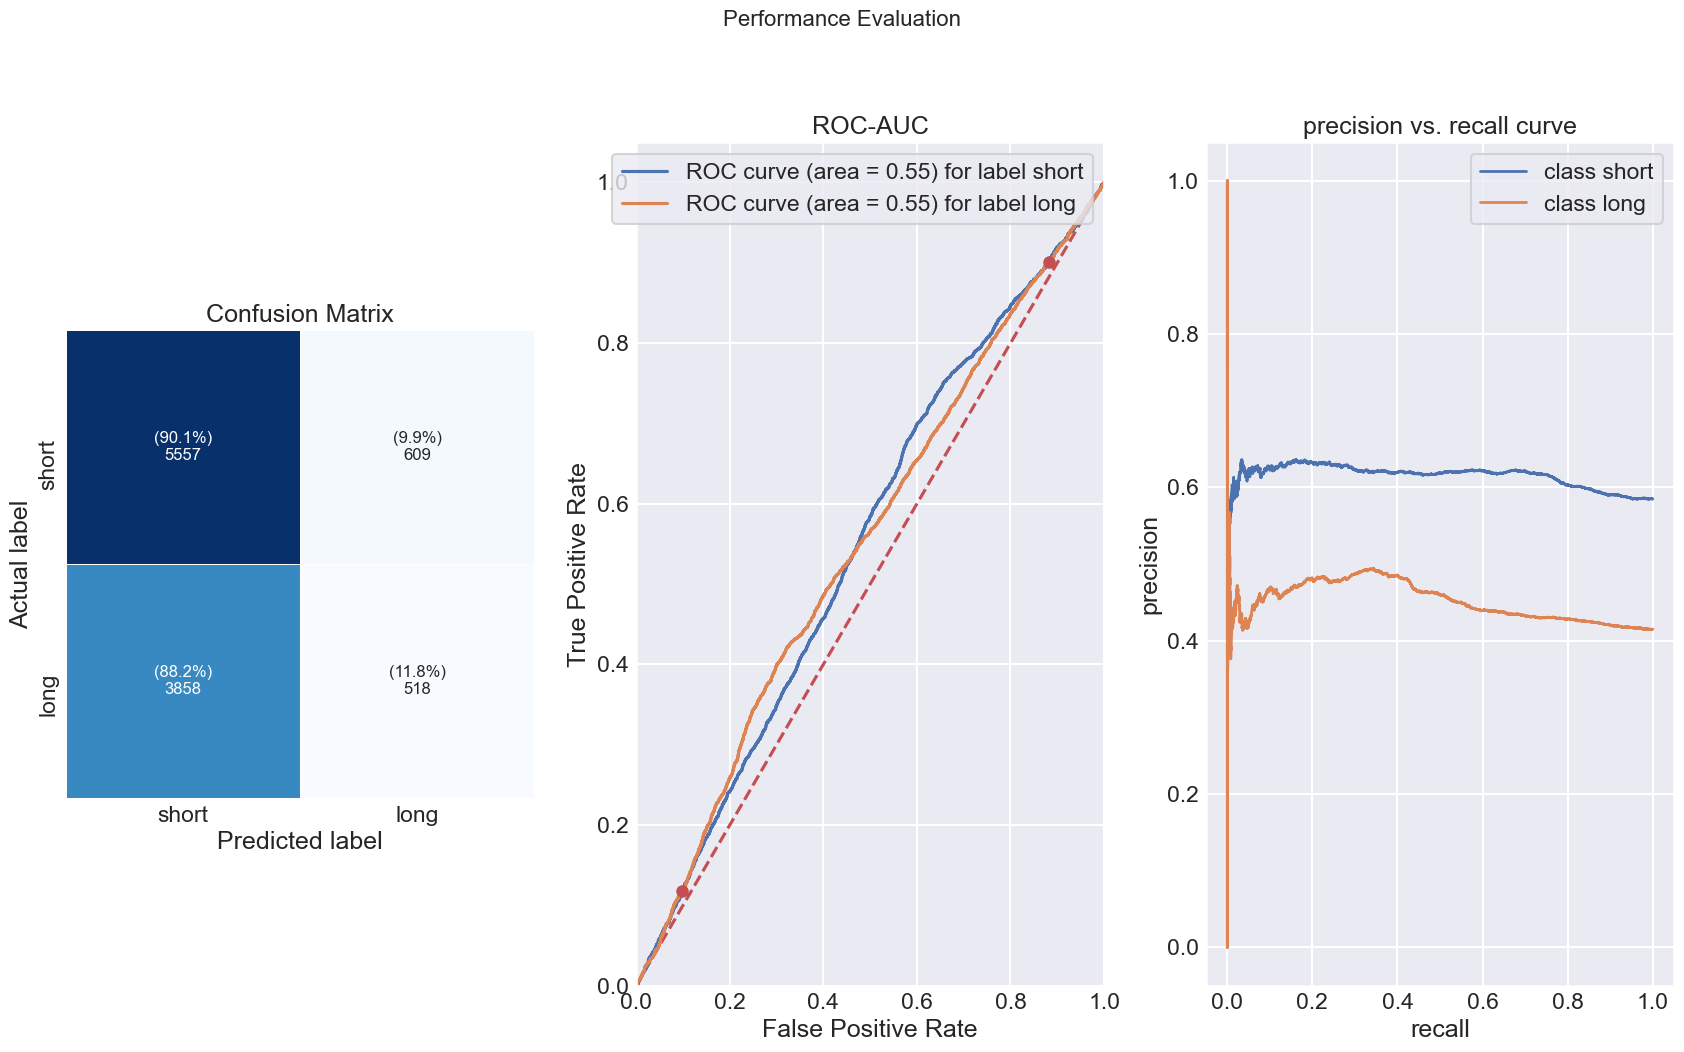

In [57]:
rf_clf, rf_clf_perf = run_rf_model(
    X_train_mrg, y_train, X_validate, y_validate, model=stack_clf, params=RF_PARAMS
)
agg_res["rf_multiclass_all_feat_fracdiff_non_rank_stack"] = format_results(rf_clf_perf)

In [58]:
get_agg_results(agg_res)

,accuracy,precision,recall,mcc,specificity,f1_score,cohens_kappa
rf_multiclass_all_feat_fracdiff_non_rank_scaled,0.5250,0.5248,0.5255,0.0502,0.5255,0.5214,0.0495
rf_multiclass_all_feat_fracdiff_non_rank,0.5136,0.5435,0.5407,0.0841,0.5407,0.5113,0.0751
rf_multiclass_all_feat_fracdiff_non_rank_voting,0.5095,0.5156,0.5160,0.0316,0.5160,0.5083,0.0307
rf_multiclass_all_feat_fracdiff_non_rank_stack,0.5763,0.5249,0.5098,0.0313,0.5098,0.4508,0.0220
rf_multiclass_shap_feat_fracdiff_nr,0.4437,0.5671,0.5175,0.0685,0.5175,0.3674,0.0297
rf_multiclass_all_feat_fracdiff,0.4446,0.5852,0.5199,0.0822,0.5199,0.3646,0.0335
rf_multiclass_shap_feat_fracdiff,0.4427,0.5867,0.5187,0.0806,0.5187,0.3599,0.0316
rf_multiclass_shap_feat,0.4427,0.6659,0.5224,0.1221,0.5224,0.3481,0.0377
rf_multiclass_all_feat,0.4415,0.6650,0.5214,0.1190,0.5214,0.3458,0.0360


# TSFresh Features

In [59]:
from sktime.datatypes._panel._convert import (
    from_2d_array_to_nested,
    from_nested_to_2d_array,
    is_nested_dataframe,
)

ImportError: cannot import name 'is_nested_dataframe' from 'sktime.datatypes._panel._convert' (C:\Users\vaibh\anaconda3\lib\site-packages\sktime\datatypes\_panel\_convert.py)

In [ ]:
X_train_nested = from_2d_array_to_nested(X_train_mrg)
X_train_nested

In [ ]:
X_validate_nested = from_2d_array_to_nested(X_validate)
X_validate_nested

In [ ]:
from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.dictionary_based import TemporalDictionaryEnsemble
from sktime.classification.hybrid import HIVECOTEV2
from sktime.classification.interval_based import DrCIF
from sktime.classification.kernel_based import RocketClassifier
from sktime.transformations.panel.compose import ColumnConcatenator
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor
from sktime.classification.distance_based import ElasticEnsemble, ProximityForest
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
tsfresh = TSFreshFeatureExtractor(default_fc_parameters="efficient", n_jobs=-1)
randf = RandomForestClassifier(**RF_PARAMS)
pipe = Pipeline(
    [
        ("transform", tsfresh),
        ("classifier", randf),
    ]
)


In [ ]:
rf_clf, rf_clf_perf = run_rf_model(
    X_train_nested,
    y_train,
    X_validate_nested,
    y_validate,
    model=pipe,
    params=RF_PARAMS,
)

In [ ]:
tsfresh = TSFreshFeatureExtractor(default_fc_parameters="efficient", n_jobs=-1)
rocket = RocketClassifier(n_jobs=-1)
pipe = Pipeline(
    [
        ("transform", tsfresh),
        ("classifier", rocket),
    ]
)

agg_res["rf_multiclass_tsfresh_fracdiff_non_rank"] = format_results(rf_clf_perf)

# Sktime timeseries models

## TimeSeriesForestClassifer

[link](https://www.sktime.org/en/latest/api_reference/auto_generated/sktime.classification.interval_based.TimeSeriesForestClassifier.html)

In [ ]:
clf = TimeSeriesForestClassifier(n_estimators=250, n_jobs=-1)
clf, clf_perf = run_rf_model(
    X_train_nested,
    y_train,
    X_validate_nested,
    y_validate,
    model=clf,
)
agg_res["tsrfc_multiclass_all_feat_fracdiff_non_rank"] = format_results(clf_perf)

## ElasticEnsemble

[link](https://www.sktime.org/en/latest/api_reference/auto_generated/sktime.classification.distance_based.ElasticEnsemble.html)

too slow for now

In [ ]:
"""clf = ElasticEnsemble(
    proportion_train_in_param_finding=0.05,
    proportion_of_param_options=0.05,
    proportion_train_for_test=0.05,
    distance_measures = ["dtw","ddtw"],
    majority_vote=True,
    n_jobs=-1,
)

clf, clf_perf = run_rf_model(
    X_train_nested,
    y_train,
    X_validate_nested,
    y_validate,
    model=clf,
)
agg_res["ee_multiclass_all_feat_fracdiff_non_rank"] = format_results(clf_perf)"""

## ProximityForest

[link](https://www.sktime.org/en/latest/api_reference/auto_generated/sktime.classification.distance_based.ProximityForest.html)

In [ ]:
clf = ProximityForest(n_estimators=50, n_jobs=-1)
clf, clf_perf = run_rf_model(
    X_train_nested,
    y_train,
    X_validate_nested,
    y_validate,
    model=clf,
)
agg_res["pf_multiclass_all_feat_fracdiff_non_rank"] = format_results(clf_perf)

## HiveCotev2

[link](https://www.sktime.org/en/latest/api_reference/auto_generated/sktime.classification.hybrid.HIVECOTEV2.html)

In [67]:
'''from sktime.classification.hybrid import HIVECOTEV2
from sktime.contrib.vector_classifiers._rotation_forest import RotationForest

clf = HIVECOTEV2(
    stc_params={
        "estimator": RotationForest(n_estimators=3),
        "n_shapelet_samples": 500,
        "max_shapelets": 20,
        "batch_size": 100,
    },
    drcif_params={"n_estimators": 10},
    arsenal_params={"num_kernels": 100, "n_estimators": 5},
    tde_params={
        "n_parameter_samples": 25,
        "max_ensemble_size": 5,
        "randomly_selected_params": 10,
    },
    n_jobs=-1,
    time_limit_in_minutes=0.25,
)

clf, clf_perf = run_rf_model(
    X_train_nested,
    y_train,
    X_validate_nested,
    y_validate,
    model=clf,
)
agg_res["hc2_multiclass_all_feat_fracdiff_non_rank"] = format_results(clf_perf)'''

'from sktime.classification.hybrid import HIVECOTEV2\nfrom sktime.contrib.vector_classifiers._rotation_forest import RotationForest\n\nclf = HIVECOTEV2(\n    stc_params={\n        "estimator": RotationForest(n_estimators=3),\n        "n_shapelet_samples": 500,\n        "max_shapelets": 20,\n        "batch_size": 100,\n    },\n    drcif_params={"n_estimators": 10},\n    arsenal_params={"num_kernels": 100, "n_estimators": 5},\n    tde_params={\n        "n_parameter_samples": 25,\n        "max_ensemble_size": 5,\n        "randomly_selected_params": 10,\n    },\n    n_jobs=-1,\n    time_limit_in_minutes=0.25,\n)\n\nclf, clf_perf = run_rf_model(\n    X_train_nested,\n    y_train,\n    X_validate_nested,\n    y_validate,\n    model=clf,\n)\nagg_res["hc2_multiclass_all_feat_fracdiff_non_rank"] = format_results(clf_perf)'

# OOS

ERROR! Session/line number was not unique in database. History logging moved to new session 837
{'accuracy': array([0.4478, 0.4478]),
 'cohens_kappa': -0.0338,
 'f1_score': array([0.4067, 0.4836]),
 'mcc': -0.0392,
 'precision': array([0.5732, 0.386 ]),
 'recall': array([0.3151, 0.6472]),
 'specificity': array([0.6472, 0.3151])}


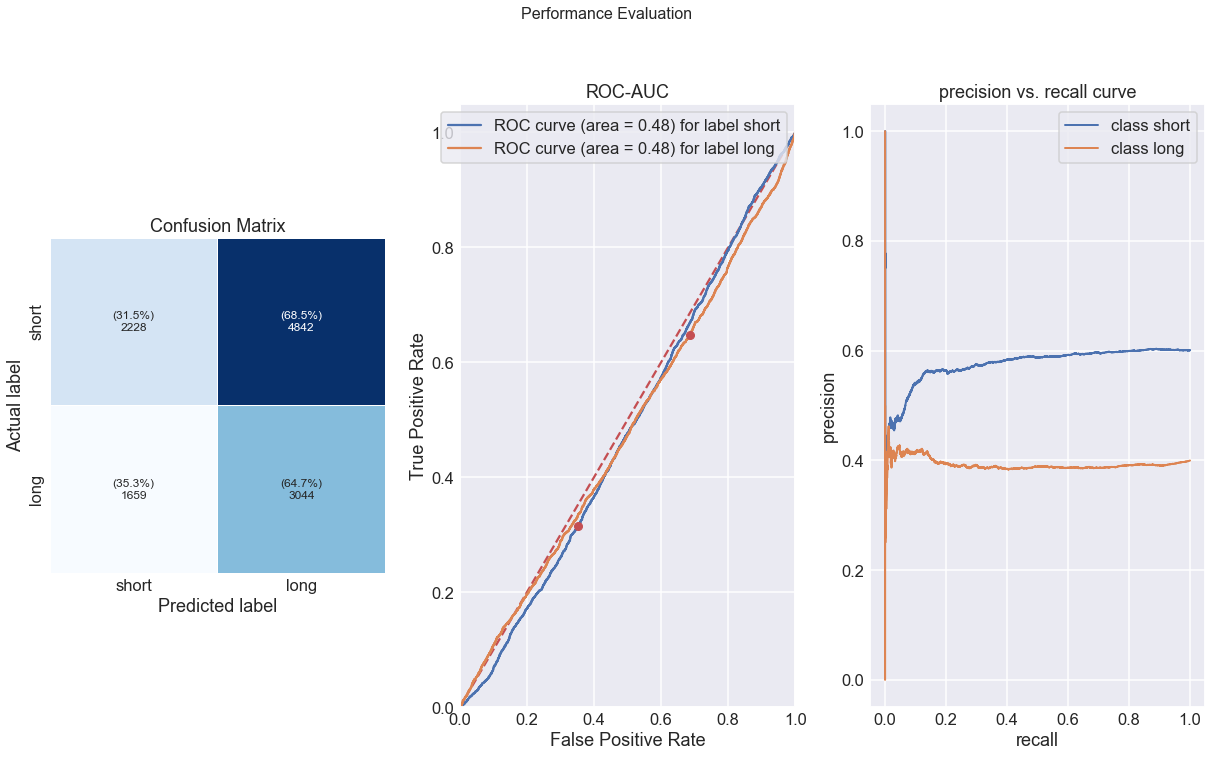

In [68]:
rf_clf, rf_clf_perf = run_rf_model(
    X_train_mrg, y_train, X_test, y_test, params=RF_PARAMS
)
agg_res["OOS_rf_multiclass_all_feat_fracdiff_non_rank"] = format_results(rf_clf_perf)

In [69]:
pipe = make_pipeline(StandardScaler(), make_rf_clf(RF_PARAMS))

{'accuracy': array([0.487, 0.487]),
 'cohens_kappa': -0.028,
 'f1_score': array([0.536 , 0.4266]),
 'mcc': -0.0285,
 'precision': array([0.5867, 0.3854]),
 'recall': array([0.4934, 0.4776]),
 'specificity': array([0.4776, 0.4934])}


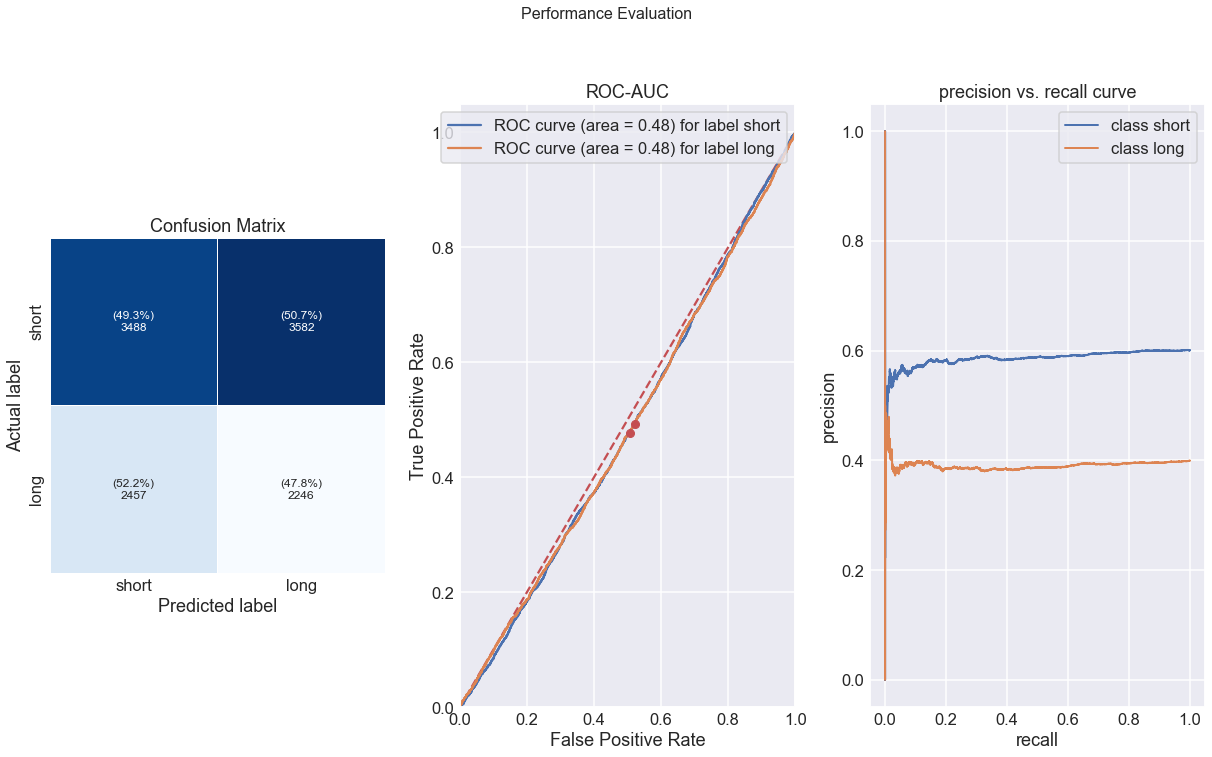

In [70]:
rf_clf, rf_clf_perf = run_rf_model(
    X_train_mrg, y_train, X_test, y_test, model=pipe, params=RF_PARAMS
)
agg_res["OOS_rf_multiclass_all_feat_fracdiff_non_rank_scaled"] = format_results(rf_clf_perf)

In [71]:
get_agg_results(agg_res)

,accuracy,precision,recall,mcc,specificity,f1_score,cohens_kappa
rf_multiclass_all_feat_fracdiff_non_rank_scaled,0.5250,0.5248,0.5255,0.0502,0.5255,0.5214,0.0495
rf_multiclass_all_feat_fracdiff_non_rank,0.5136,0.5435,0.5407,0.0841,0.5407,0.5113,0.0751
rf_multiclass_all_feat_fracdiff_non_rank_voting,0.5095,0.5156,0.5160,0.0316,0.5160,0.5083,0.0307
OOS_rf_multiclass_all_feat_fracdiff_non_rank_scaled,0.4870,0.4860,0.4855,-0.0285,0.4855,0.4813,-0.0280
rf_multiclass_all_feat_fracdiff_non_rank_stack,0.5763,0.5249,0.5098,0.0313,0.5098,0.4508,0.0220
OOS_rf_multiclass_all_feat_fracdiff_non_rank,0.4478,0.4796,0.4811,-0.0392,0.4811,0.4451,-0.0338
rf_multiclass_tsfresh_fracdiff_non_rank,0.5403,0.4622,0.4802,-0.0548,0.4802,0.4326,-0.0437
rf_multiclass_shap_feat_fracdiff_nr,0.4437,0.5671,0.5175,0.0685,0.5175,0.3674,0.0297
rf_multiclass_all_feat_fracdiff,0.4446,0.5852,0.5199,0.0822,0.5199,0.3646,0.0335
rf_multiclass_shap_feat_fracdiff,0.4427,0.5867,0.5187,0.0806,0.5187,0.3599,0.0316
